<a href="https://colab.research.google.com/github/AristarkhovZakhar/deep_learning/blob/main/HEART_WITH_STACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

In [33]:
plt.rcParams['figure.figsize'] = (11, 6.5)

In [145]:
data = pd.read_csv('heart_disease_uci.csv', )
data_with_features = pd.read_csv('heart_disease_uci.csv', )
data_with_age_and_mull = pd.read_csv('heart_disease_uci.csv', )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [35]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [36]:
num_cols = [
    'age',
    'trestbps',
    'chol',
    'thalch',
    'oldpeak',
    ]

cat_cols = [
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'slope',
    'thal',
    'ca',

]

target_col = ['num']
feature_cols = num_cols + cat_cols

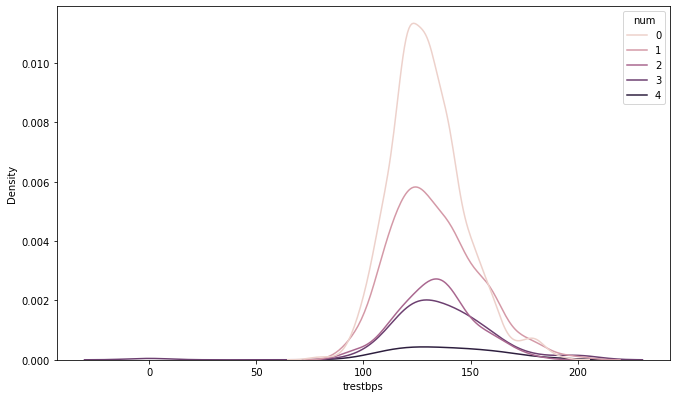

In [37]:
sns.kdeplot(x='trestbps', data=data, hue='num')

In [58]:
def draw_auc(y_train, y_test, y_train_predicted, y_test_predicted):
    """ Функция для отрисовки AUC """

    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)

    fig = plt.figure(figsize=(20,10))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label=f'train AUC={train_auc}')
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label=f'test AUC={test_auc}')
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("grey")
    legend_box.set_edgecolor("blue")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

In [38]:
def give_report(y_test, y_test_predicted):
  print(classification_report(y_test, y_test_predicted)) 
  print(confusion_matrix (y_test, y_test_predicted))


In [158]:
def scaling_and_transform(data, feature=None, dop_features=None):


  num_cols = [
      'age',
      'trestbps',
      'chol',
      'thalch',
      'oldpeak',
      ]

  cat_cols = [
      'sex',
      'cp',
      'fbs',
      'restecg',
      'exang',
      'slope',
      'thal',
      'ca',

  ]


  if feature:
    cat_cols = cat_cols + dop_features
  # удаляем пропуски в данных
  for column in cat_cols:
    data[column].replace('', np.nan, inplace = True)
    data.dropna(subset=[column], inplace = True)

  for column in num_cols:
    data.dropna(subset=[column], inplace = True)

  # проебразуем таргеты в два класса
  data['num'].replace([*range(1,5)], 1, inplace = True)

  # преобразуем категориальные признаки 
  data = pd.get_dummies(data, columns=cat_cols)

  # Стандартизируем данные
  st = StandardScaler()
  X = st.fit_transform(data.drop(['num', 'id','dataset'], axis=1))
  X_train, X_test, y_train, y_test = train_test_split(X, data['num'], test_size=0.15, random_state=42)

  return ( data, X_train, y_train, X_test, y_test,)

In [110]:
simple_data = scaling_and_transform(data)
data_feature = scaling_and_transform(data_with_features)
data_age_mull = scaling_and_transform(data_with_age_and_mull)

In [111]:
print(len(simple_data[1]))
print(len(simple_data[2]))
print(len(simple_data[3]))
print(len(simple_data[4]))

254
254
45
45


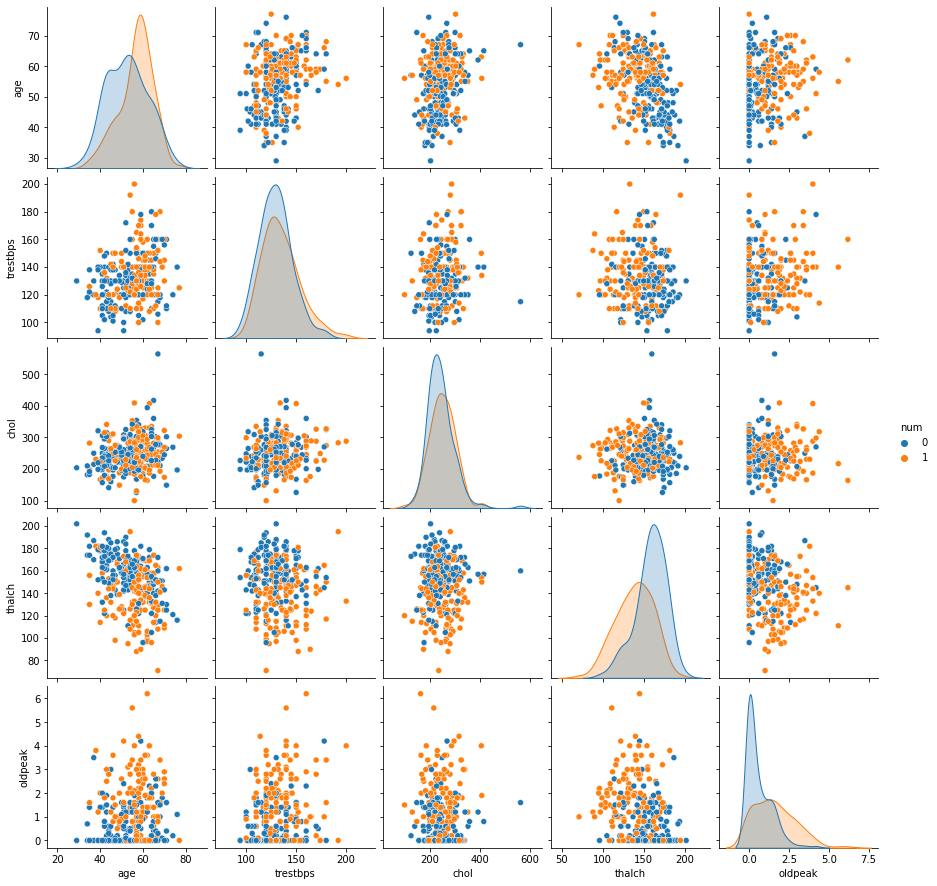

In [42]:
sns.pairplot(data[num_cols+target_col], hue = 'num')

In [43]:
data['num'].value_counts()

0    160
1    139
Name: num, dtype: int64

In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
search_rbf = GridSearchCV(svm.SVC(kernel='poly', gamma='auto'),
                               param_grid = {
                                   'C' : np.arange(1, 10,1),
                                   'degree' : np.arange(1,30),
                                   'coef0' : np.arange(1, 10, 1)
                                   },
                               scoring = 'accuracy',
                               cv = 3,
                               refit=True,
                               verbose=10)
search_rbf.fit(simple_data[1], simple_data[2])
search_rbf_predict = search_rbf.predict(simple_data[3])
print(accuracy_score(simple_data[4], search_rbf_predict))

Выходные данные были обрезаны до нескольких последних строк (5000).
[CV 3/3; 1516/2349] END .C=6, coef0=8, degree=8;, score=0.810 total time=   0.0s
[CV 1/3; 1517/2349] START C=6, coef0=8, degree=9................................
[CV 1/3; 1517/2349] END .C=6, coef0=8, degree=9;, score=0.706 total time=   0.0s
[CV 2/3; 1517/2349] START C=6, coef0=8, degree=9................................
[CV 2/3; 1517/2349] END .C=6, coef0=8, degree=9;, score=0.812 total time=   0.0s
[CV 3/3; 1517/2349] START C=6, coef0=8, degree=9................................
[CV 3/3; 1517/2349] END .C=6, coef0=8, degree=9;, score=0.810 total time=   0.0s
[CV 1/3; 1518/2349] START C=6, coef0=8, degree=10...............................
[CV 1/3; 1518/2349] END C=6, coef0=8, degree=10;, score=0.718 total time=   0.0s
[CV 2/3; 1518/2349] START C=6, coef0=8, degree=10...............................
[CV 2/3; 1518/2349] END C=6, coef0=8, degree=10;, score=0.835 total time=   0.0s
[CV 3/3; 1518/2349] START C=6, coef0=8, d

In [47]:
search_sigmoid = GridSearchCV(svm.SVC(kernel='rbf'),
                               param_grid = {
                                   'gamma' : np.arange(0.01, 10, 0.01),
                                   },
                               scoring = 'accuracy',
                               cv = 3,
                               refit=True,
                               verbose=10)
search_sigmoid.fit(simple_data[1], simple_data[2])
search_sigmoid_predict = search_sigmoid.predict(simple_data[3])
print(search_sigmoid.best_params_)
print(accuracy_score(simple_data[4], search_sigmoid_predict))

Выходные данные были обрезаны до нескольких последних строк (5000).
[CV 1/3; 167/999] START gamma=1.6700000000000002................................
[CV 1/3; 167/999] END .gamma=1.6700000000000002;, score=0.529 total time=   0.0s
[CV 2/3; 167/999] START gamma=1.6700000000000002................................
[CV 2/3; 167/999] END .gamma=1.6700000000000002;, score=0.518 total time=   0.0s
[CV 3/3; 167/999] START gamma=1.6700000000000002................................
[CV 3/3; 167/999] END .gamma=1.6700000000000002;, score=0.524 total time=   0.0s
[CV 1/3; 168/999] START gamma=1.68..............................................
[CV 1/3; 168/999] END ...............gamma=1.68;, score=0.529 total time=   0.0s
[CV 2/3; 168/999] START gamma=1.68..............................................
[CV 2/3; 168/999] END ...............gamma=1.68;, score=0.518 total time=   0.0s
[CV 3/3; 168/999] START gamma=1.68..............................................
[CV 3/3; 168/999] END ...............gamm

In [49]:
search_linear = GridSearchCV(svm.LinearSVC(),
                               param_grid = {
                                   'loss' : ['hinge', 'squared_hinge'],
                                   'C' : np.arange(0,5,0.01)
                                   },
                               scoring = 'accuracy',
                               cv = 3,
                               verbose=10)
search_linear.fit(simple_data[1], simple_data[2])
search_linear_predict = search_linear.predict(simple_data[3])
print(accuracy_score(simple_data[4], search_linear_predict))

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV 1/3; 1/1000] START C=0.0, loss=hinge........................................
[CV 1/3; 1/1000] END ...........C=0.0, loss=hinge;, score=nan total time=   0.0s
[CV 2/3; 1/1000] START C=0.0, loss=hinge........................................
[CV 2/3; 1/1000] END ...........C=0.0, loss=hinge;, score=nan total time=   0.0s
[CV 3/3; 1/1000] START C=0.0, loss=hinge........................................
[CV 3/3; 1/1000] END ...........C=0.0, loss=hinge;, score=nan total time=   0.0s
[CV 1/3; 2/1000] START C=0.0, loss=squared_hinge................................
[CV 1/3; 2/1000] END ...C=0.0, loss=squared_hinge;, score=nan total time=   0.0s
[CV 2/3; 2/1000] START C=0.0, loss=squared_hinge................................
[CV 2/3; 2/1000] END ...C=0.0, loss=squared_hinge;, score=nan total time=   0.0s
[CV 3/3; 2/1000] START C=0.0, loss=squared_hinge................................
[CV 3/3; 2/1000] END ...C=0.0, loss=squared_

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 33/1000] END .......C=0.16, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 34/1000] START C=0.16, loss=squared_hinge..............................
[CV 1/3; 34/1000] END C=0.16, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 34/1000] START C=0.16, loss=squared_hinge..............................
[CV 2/3; 34/1000] END C=0.16, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 34/1000] START C=0.16, loss=squared_hinge..............................
[CV 3/3; 34/1000] END C=0.16, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 35/1000] START C=0.17, loss=hinge......................................
[CV 1/3; 35/1000] END .......C=0.17, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 35/1000] START C=0.17, loss=hinge......................................
[CV 2/3; 35/1000] END .......C=0.17, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 35/1000] START C=0.17, loss=hinge......................................
[CV 3/3; 35/1000] END ...

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 45/1000] END .......C=0.22, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 46/1000] START C=0.22, loss=squared_hinge..............................
[CV 1/3; 46/1000] END C=0.22, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 46/1000] START C=0.22, loss=squared_hinge..............................
[CV 2/3; 46/1000] END C=0.22, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 46/1000] START C=0.22, loss=squared_hinge..............................
[CV 3/3; 46/1000] END C=0.22, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 47/1000] START C=0.23, loss=hinge......................................
[CV 1/3; 47/1000] END .......C=0.23, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 47/1000] START C=0.23, loss=hinge......................................
[CV 2/3; 47/1000] END .......C=0.23, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 47/1000] START C=0.23, loss=hinge......................................
[CV 3/3; 47/1000] END ...

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 56/1000] END C=0.27, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 56/1000] START C=0.27, loss=squared_hinge..............................
[CV 3/3; 56/1000] END C=0.27, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 57/1000] START C=0.28, loss=hinge......................................
[CV 1/3; 57/1000] END .......C=0.28, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 57/1000] START C=0.28, loss=hinge......................................
[CV 2/3; 57/1000] END .......C=0.28, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 57/1000] START C=0.28, loss=hinge......................................
[CV 3/3; 57/1000] END .......C=0.28, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 58/1000] START C=0.28, loss=squared_hinge..............................
[CV 1/3; 58/1000] END C=0.28, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 58/1000] START C=0.28, loss=squared_hinge..............................
[CV 2/3; 58/1000] END C=0

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 77/1000] END .......C=0.38, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 77/1000] START C=0.38, loss=hinge......................................
[CV 3/3; 77/1000] END .......C=0.38, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 78/1000] START C=0.38, loss=squared_hinge..............................
[CV 1/3; 78/1000] END C=0.38, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 78/1000] START C=0.38, loss=squared_hinge..............................
[CV 2/3; 78/1000] END C=0.38, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 78/1000] START C=0.38, loss=squared_hinge..............................
[CV 3/3; 78/1000] END C=0.38, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 79/1000] START C=0.39, loss=hinge......................................
[CV 1/3; 79/1000] END .......C=0.39, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 79/1000] START C=0.39, loss=hinge......................................
[CV 2/3; 79/1000] END ...

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning


[CV 3/3; 86/1000] START C=0.42, loss=squared_hinge..............................
[CV 3/3; 86/1000] END C=0.42, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 87/1000] START C=0.43, loss=hinge......................................
[CV 1/3; 87/1000] END .......C=0.43, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 87/1000] START C=0.43, loss=hinge......................................
[CV 2/3; 87/1000] END .......C=0.43, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 87/1000] START C=0.43, loss=hinge......................................
[CV 3/3; 87/1000] END .......C=0.43, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 88/1000] START C=0.43, loss=squared_hinge..............................
[CV 1/3; 88/1000] END C=0.43, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 88/1000] START C=0.43, loss=squared_hinge..............................
[CV 2/3; 88/1000] END C=0.43, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 88/1000] START 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 95/1000] END C=0.47000000000000003, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 95/1000] START C=0.47000000000000003, loss=hinge.......................
[CV 2/3; 95/1000] END C=0.47000000000000003, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 95/1000] START C=0.47000000000000003, loss=hinge.......................
[CV 3/3; 95/1000] END C=0.47000000000000003, loss=hinge;, score=0.798 total time=   0.0s
[CV 1/3; 96/1000] START C=0.47000000000000003, loss=squared_hinge...............
[CV 1/3; 96/1000] END C=0.47000000000000003, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 96/1000] START C=0.47000000000000003, loss=squared_hinge...............
[CV 2/3; 96/1000] END C=0.47000000000000003, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 96/1000] START C=0.47000000000000003, loss=squared_hinge...............
[CV 3/3; 96/1000] END C=0.47000000000000003, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 97/1000] START C=0.48, loss=

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning


[CV 2/3; 101/1000] START C=0.5, loss=hinge......................................
[CV 2/3; 101/1000] END .......C=0.5, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 101/1000] START C=0.5, loss=hinge......................................
[CV 3/3; 101/1000] END .......C=0.5, loss=hinge;, score=0.798 total time=   0.0s
[CV 1/3; 102/1000] START C=0.5, loss=squared_hinge..............................
[CV 1/3; 102/1000] END C=0.5, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 102/1000] START C=0.5, loss=squared_hinge..............................
[CV 2/3; 102/1000] END C=0.5, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 102/1000] START C=0.5, loss=squared_hinge..............................
[CV 3/3; 102/1000] END C=0.5, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 103/1000] START C=0.51, loss=hinge.....................................
[CV 1/3; 103/1000] END ......C=0.51, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 103/1000] START

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning


[CV 2/3; 107/1000] END ......C=0.53, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 107/1000] START C=0.53, loss=hinge.....................................
[CV 3/3; 107/1000] END ......C=0.53, loss=hinge;, score=0.798 total time=   0.0s
[CV 1/3; 108/1000] START C=0.53, loss=squared_hinge.............................
[CV 1/3; 108/1000] END C=0.53, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 108/1000] START C=0.53, loss=squared_hinge.............................
[CV 2/3; 108/1000] END C=0.53, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 108/1000] START C=0.53, loss=squared_hinge.............................
[CV 3/3; 108/1000] END C=0.53, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 109/1000] START C=0.54, loss=hinge.....................................
[CV 1/3; 109/1000] END ......C=0.54, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 109/1000] START C=0.54, loss=hinge.....................................
[CV 2/3; 109/1000] EN

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning


[CV 3/3; 112/1000] START C=0.55, loss=squared_hinge.............................
[CV 3/3; 112/1000] END C=0.55, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 113/1000] START C=0.56, loss=hinge.....................................
[CV 1/3; 113/1000] END ......C=0.56, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 113/1000] START C=0.56, loss=hinge.....................................
[CV 2/3; 113/1000] END ......C=0.56, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 113/1000] START C=0.56, loss=hinge.....................................
[CV 3/3; 113/1000] END ......C=0.56, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 114/1000] START C=0.56, loss=squared_hinge.............................
[CV 1/3; 114/1000] END C=0.56, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 114/1000] START C=0.56, loss=squared_hinge.............................
[CV 2/3; 114/1000] END C=0.56, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 114/1000] ST

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 118/1000] END C=0.58, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 118/1000] START C=0.58, loss=squared_hinge.............................
[CV 2/3; 118/1000] END C=0.58, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 118/1000] START C=0.58, loss=squared_hinge.............................
[CV 3/3; 118/1000] END C=0.58, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 119/1000] START C=0.59, loss=hinge.....................................
[CV 1/3; 119/1000] END ......C=0.59, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 119/1000] START C=0.59, loss=hinge.....................................
[CV 2/3; 119/1000] END ......C=0.59, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 119/1000] START C=0.59, loss=hinge.....................................
[CV 3/3; 119/1000] END ......C=0.59, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 120/1000] START C=0.59, loss=squared_hinge.............................
[CV 1/3; 120/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 130/1000] END C=0.64, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 130/1000] START C=0.64, loss=squared_hinge.............................
[CV 3/3; 130/1000] END C=0.64, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 131/1000] START C=0.65, loss=hinge.....................................
[CV 1/3; 131/1000] END ......C=0.65, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 131/1000] START C=0.65, loss=hinge.....................................
[CV 2/3; 131/1000] END ......C=0.65, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 131/1000] START C=0.65, loss=hinge.....................................
[CV 3/3; 131/1000] END ......C=0.65, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 132/1000] START C=0.65, loss=squared_hinge.............................
[CV 1/3; 132/1000] END C=0.65, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 132/1000] START C=0.65, loss=squared_hinge.............................
[CV 2/3; 132/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 137/1000] END ......C=0.68, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 138/1000] START C=0.68, loss=squared_hinge.............................
[CV 1/3; 138/1000] END C=0.68, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 138/1000] START C=0.68, loss=squared_hinge.............................
[CV 2/3; 138/1000] END C=0.68, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 138/1000] START C=0.68, loss=squared_hinge.............................
[CV 3/3; 138/1000] END C=0.68, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 139/1000] START C=0.6900000000000001, loss=hinge.......................
[CV 1/3; 139/1000] END C=0.6900000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 139/1000] START C=0.6900000000000001, loss=hinge.......................
[CV 2/3; 139/1000] END C=0.6900000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 139/1000] START C=0.6900000000000001, loss=hinge.......................
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 144/1000] END C=0.71, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 144/1000] START C=0.71, loss=squared_hinge.............................
[CV 3/3; 144/1000] END C=0.71, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 145/1000] START C=0.72, loss=hinge.....................................
[CV 1/3; 145/1000] END ......C=0.72, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 145/1000] START C=0.72, loss=hinge.....................................
[CV 2/3; 145/1000] END ......C=0.72, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 145/1000] START C=0.72, loss=hinge.....................................
[CV 3/3; 145/1000] END ......C=0.72, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 146/1000] START C=0.72, loss=squared_hinge.............................
[CV 1/3; 146/1000] END C=0.72, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 146/1000] START C=0.72, loss=squared_hinge.............................
[CV 2/3; 146/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 151/1000] END ......C=0.75, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 151/1000] START C=0.75, loss=hinge.....................................
[CV 3/3; 151/1000] END ......C=0.75, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 152/1000] START C=0.75, loss=squared_hinge.............................
[CV 1/3; 152/1000] END C=0.75, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 152/1000] START C=0.75, loss=squared_hinge.............................
[CV 2/3; 152/1000] END C=0.75, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 152/1000] START C=0.75, loss=squared_hinge.............................
[CV 3/3; 152/1000] END C=0.75, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 153/1000] START C=0.76, loss=hinge.....................................
[CV 1/3; 153/1000] END ......C=0.76, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 153/1000] START C=0.76, loss=hinge.....................................
[CV 2/3; 153/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 158/1000] END C=0.78, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 158/1000] START C=0.78, loss=squared_hinge.............................
[CV 3/3; 158/1000] END C=0.78, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 159/1000] START C=0.79, loss=hinge.....................................
[CV 1/3; 159/1000] END ......C=0.79, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 159/1000] START C=0.79, loss=hinge.....................................
[CV 2/3; 159/1000] END ......C=0.79, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 159/1000] START C=0.79, loss=hinge.....................................
[CV 3/3; 159/1000] END ......C=0.79, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 160/1000] START C=0.79, loss=squared_hinge.............................
[CV 1/3; 160/1000] END C=0.79, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 160/1000] START C=0.79, loss=squared_hinge.............................
[CV 2/3; 160/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 163/1000] END ......C=0.81, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 163/1000] START C=0.81, loss=hinge.....................................
[CV 3/3; 163/1000] END ......C=0.81, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 164/1000] START C=0.81, loss=squared_hinge.............................
[CV 1/3; 164/1000] END C=0.81, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 164/1000] START C=0.81, loss=squared_hinge.............................
[CV 2/3; 164/1000] END C=0.81, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 164/1000] START C=0.81, loss=squared_hinge.............................
[CV 3/3; 164/1000] END C=0.81, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 165/1000] START C=0.8200000000000001, loss=hinge.......................
[CV 1/3; 165/1000] END C=0.8200000000000001, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 165/1000] START C=0.8200000000000001, loss=hinge.......................


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 165/1000] END C=0.8200000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 165/1000] START C=0.8200000000000001, loss=hinge.......................
[CV 3/3; 165/1000] END C=0.8200000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 166/1000] START C=0.8200000000000001, loss=squared_hinge...............
[CV 1/3; 166/1000] END C=0.8200000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 166/1000] START C=0.8200000000000001, loss=squared_hinge...............
[CV 2/3; 166/1000] END C=0.8200000000000001, loss=squared_hinge;, score=0.847 total time=   0.1s
[CV 3/3; 166/1000] START C=0.8200000000000001, loss=squared_hinge...............
[CV 3/3; 166/1000] END C=0.8200000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 167/1000] START C=0.8300000000000001, loss=hinge.......................


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3; 167/1000] END C=0.8300000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 167/1000] START C=0.8300000000000001, loss=hinge.......................
[CV 2/3; 167/1000] END C=0.8300000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 167/1000] START C=0.8300000000000001, loss=hinge.......................
[CV 3/3; 167/1000] END C=0.8300000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 168/1000] START C=0.8300000000000001, loss=squared_hinge...............
[CV 1/3; 168/1000] END C=0.8300000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 168/1000] START C=0.8300000000000001, loss=squared_hinge...............
[CV 2/3; 168/1000] END C=0.8300000000000001, loss=squared_hinge;, score=0.847 total time=   0.1s
[CV 3/3; 168/1000] START C=0.8300000000000001, loss=squared_hinge...............
[CV 3/3; 168/1000] END C=0.8300000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 169/1000] START C=0.84, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 172/1000] END C=0.85, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 172/1000] START C=0.85, loss=squared_hinge.............................
[CV 3/3; 172/1000] END C=0.85, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 173/1000] START C=0.86, loss=hinge.....................................
[CV 1/3; 173/1000] END ......C=0.86, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 173/1000] START C=0.86, loss=hinge.....................................
[CV 2/3; 173/1000] END ......C=0.86, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 173/1000] START C=0.86, loss=hinge.....................................
[CV 3/3; 173/1000] END ......C=0.86, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 174/1000] START C=0.86, loss=squared_hinge.............................
[CV 1/3; 174/1000] END C=0.86, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 174/1000] START C=0.86, loss=squared_hinge.............................
[CV 2/3; 174/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 178/1000] END C=0.88, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 178/1000] START C=0.88, loss=squared_hinge.............................
[CV 2/3; 178/1000] END C=0.88, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 178/1000] START C=0.88, loss=squared_hinge.............................
[CV 3/3; 178/1000] END C=0.88, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 179/1000] START C=0.89, loss=hinge.....................................
[CV 1/3; 179/1000] END ......C=0.89, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 179/1000] START C=0.89, loss=hinge.....................................
[CV 2/3; 179/1000] END ......C=0.89, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 179/1000] START C=0.89, loss=hinge.....................................
[CV 3/3; 179/1000] END ......C=0.89, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 180/1000] START C=0.89, loss=squared_hinge.............................
[CV 1/3; 180/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 184/1000] END C=0.91, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 184/1000] START C=0.91, loss=squared_hinge.............................
[CV 3/3; 184/1000] END C=0.91, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 185/1000] START C=0.92, loss=hinge.....................................
[CV 1/3; 185/1000] END ......C=0.92, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 185/1000] START C=0.92, loss=hinge.....................................
[CV 2/3; 185/1000] END ......C=0.92, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 185/1000] START C=0.92, loss=hinge.....................................
[CV 3/3; 185/1000] END ......C=0.92, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 186/1000] START C=0.92, loss=squared_hinge.............................
[CV 1/3; 186/1000] END C=0.92, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 186/1000] START C=0.92, loss=squared_hinge.............................
[CV 2/3; 186/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 190/1000] END C=0.9400000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 191/1000] START C=0.9500000000000001, loss=hinge.......................
[CV 1/3; 191/1000] END C=0.9500000000000001, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 191/1000] START C=0.9500000000000001, loss=hinge.......................
[CV 2/3; 191/1000] END C=0.9500000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 191/1000] START C=0.9500000000000001, loss=hinge.......................
[CV 3/3; 191/1000] END C=0.9500000000000001, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 192/1000] START C=0.9500000000000001, loss=squared_hinge...............
[CV 1/3; 192/1000] END C=0.9500000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 192/1000] START C=0.9500000000000001, loss=squared_hinge...............
[CV 2/3; 192/1000] END C=0.9500000000000001, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 192/1000] START C=0.95000000

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 196/1000] END C=0.97, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 197/1000] START C=0.98, loss=hinge.....................................
[CV 1/3; 197/1000] END ......C=0.98, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 197/1000] START C=0.98, loss=hinge.....................................
[CV 2/3; 197/1000] END ......C=0.98, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 197/1000] START C=0.98, loss=hinge.....................................
[CV 3/3; 197/1000] END ......C=0.98, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 198/1000] START C=0.98, loss=squared_hinge.............................
[CV 1/3; 198/1000] END C=0.98, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 198/1000] START C=0.98, loss=squared_hinge.............................
[CV 2/3; 198/1000] END C=0.98, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 198/1000] START C=0.98, loss=squared_hinge.............................
[CV 3/3; 198/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 203/1000] END ......C=1.01, loss=hinge;, score=0.788 total time=   0.0s
[CV 2/3; 203/1000] START C=1.01, loss=hinge.....................................
[CV 2/3; 203/1000] END ......C=1.01, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 203/1000] START C=1.01, loss=hinge.....................................
[CV 3/3; 203/1000] END ......C=1.01, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 204/1000] START C=1.01, loss=squared_hinge.............................
[CV 1/3; 204/1000] END C=1.01, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 204/1000] START C=1.01, loss=squared_hinge.............................
[CV 2/3; 204/1000] END C=1.01, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 204/1000] START C=1.01, loss=squared_hinge.............................
[CV 3/3; 204/1000] END C=1.01, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 205/1000] START C=1.02, loss=hinge.....................................
[CV 1/3; 205/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 209/1000] END ......C=1.04, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 209/1000] START C=1.04, loss=hinge.....................................
[CV 3/3; 209/1000] END ......C=1.04, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 210/1000] START C=1.04, loss=squared_hinge.............................
[CV 1/3; 210/1000] END C=1.04, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 210/1000] START C=1.04, loss=squared_hinge.............................
[CV 2/3; 210/1000] END C=1.04, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 210/1000] START C=1.04, loss=squared_hinge.............................
[CV 3/3; 210/1000] END C=1.04, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 211/1000] START C=1.05, loss=hinge.....................................
[CV 1/3; 211/1000] END ......C=1.05, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 211/1000] START C=1.05, loss=hinge.....................................
[CV 2/3; 211/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 215/1000] END ......C=1.07, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 215/1000] START C=1.07, loss=hinge.....................................
[CV 3/3; 215/1000] END ......C=1.07, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 216/1000] START C=1.07, loss=squared_hinge.............................
[CV 1/3; 216/1000] END C=1.07, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 216/1000] START C=1.07, loss=squared_hinge.............................
[CV 2/3; 216/1000] END C=1.07, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 216/1000] START C=1.07, loss=squared_hinge.............................
[CV 3/3; 216/1000] END C=1.07, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 217/1000] START C=1.08, loss=hinge.....................................
[CV 1/3; 217/1000] END ......C=1.08, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 217/1000] START C=1.08, loss=hinge.....................................
[CV 2/3; 217/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 221/1000] END .......C=1.1, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 221/1000] START C=1.1, loss=hinge......................................
[CV 2/3; 221/1000] END .......C=1.1, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 221/1000] START C=1.1, loss=hinge......................................
[CV 3/3; 221/1000] END .......C=1.1, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 222/1000] START C=1.1, loss=squared_hinge..............................
[CV 1/3; 222/1000] END C=1.1, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 222/1000] START C=1.1, loss=squared_hinge..............................
[CV 2/3; 222/1000] END C=1.1, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 222/1000] START C=1.1, loss=squared_hinge..............................
[CV 3/3; 222/1000] END C=1.1, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 223/1000] START C=1.11, loss=hinge.....................................
[CV 1/3; 223/1000] END ..

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 227/1000] END C=1.1300000000000001, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 227/1000] START C=1.1300000000000001, loss=hinge.......................
[CV 2/3; 227/1000] END C=1.1300000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 227/1000] START C=1.1300000000000001, loss=hinge.......................
[CV 3/3; 227/1000] END C=1.1300000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 228/1000] START C=1.1300000000000001, loss=squared_hinge...............
[CV 1/3; 228/1000] END C=1.1300000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 228/1000] START C=1.1300000000000001, loss=squared_hinge...............
[CV 2/3; 228/1000] END C=1.1300000000000001, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 228/1000] START C=1.1300000000000001, loss=squared_hinge...............
[CV 3/3; 228/1000] END C=1.1300000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 229/1000] START C=1.14000000

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 233/1000] END ......C=1.16, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 233/1000] START C=1.16, loss=hinge.....................................
[CV 2/3; 233/1000] END ......C=1.16, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 233/1000] START C=1.16, loss=hinge.....................................
[CV 3/3; 233/1000] END ......C=1.16, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 234/1000] START C=1.16, loss=squared_hinge.............................
[CV 1/3; 234/1000] END C=1.16, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 234/1000] START C=1.16, loss=squared_hinge.............................
[CV 2/3; 234/1000] END C=1.16, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 234/1000] START C=1.16, loss=squared_hinge.............................
[CV 3/3; 234/1000] END C=1.16, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 235/1000] START C=1.17, loss=hinge.....................................
[CV 1/3; 235/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 239/1000] END ......C=1.19, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 239/1000] START C=1.19, loss=hinge.....................................
[CV 3/3; 239/1000] END ......C=1.19, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 240/1000] START C=1.19, loss=squared_hinge.............................
[CV 1/3; 240/1000] END C=1.19, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 240/1000] START C=1.19, loss=squared_hinge.............................
[CV 2/3; 240/1000] END C=1.19, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 240/1000] START C=1.19, loss=squared_hinge.............................
[CV 3/3; 240/1000] END C=1.19, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 241/1000] START C=1.2, loss=hinge......................................
[CV 1/3; 241/1000] END .......C=1.2, loss=hinge;, score=0.788 total time=   0.0s
[CV 2/3; 241/1000] START C=1.2, loss=hinge......................................
[CV 2/3; 241/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 245/1000] END ......C=1.22, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 245/1000] START C=1.22, loss=hinge.....................................
[CV 3/3; 245/1000] END ......C=1.22, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 246/1000] START C=1.22, loss=squared_hinge.............................
[CV 1/3; 246/1000] END C=1.22, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 246/1000] START C=1.22, loss=squared_hinge.............................
[CV 2/3; 246/1000] END C=1.22, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 246/1000] START C=1.22, loss=squared_hinge.............................
[CV 3/3; 246/1000] END C=1.22, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 247/1000] START C=1.23, loss=hinge.....................................
[CV 1/3; 247/1000] END ......C=1.23, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 247/1000] START C=1.23, loss=hinge.....................................
[CV 2/3; 247/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 251/1000] END ......C=1.25, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 252/1000] START C=1.25, loss=squared_hinge.............................
[CV 1/3; 252/1000] END C=1.25, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 252/1000] START C=1.25, loss=squared_hinge.............................
[CV 2/3; 252/1000] END C=1.25, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 252/1000] START C=1.25, loss=squared_hinge.............................
[CV 3/3; 252/1000] END C=1.25, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 253/1000] START C=1.26, loss=hinge.....................................
[CV 1/3; 253/1000] END ......C=1.26, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 253/1000] START C=1.26, loss=hinge.....................................
[CV 2/3; 253/1000] END ......C=1.26, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 253/1000] START C=1.26, loss=hinge.....................................
[CV 3/3; 253/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 257/1000] END ......C=1.28, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 257/1000] START C=1.28, loss=hinge.....................................
[CV 2/3; 257/1000] END ......C=1.28, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 257/1000] START C=1.28, loss=hinge.....................................
[CV 3/3; 257/1000] END ......C=1.28, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 258/1000] START C=1.28, loss=squared_hinge.............................
[CV 1/3; 258/1000] END C=1.28, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 258/1000] START C=1.28, loss=squared_hinge.............................
[CV 2/3; 258/1000] END C=1.28, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 258/1000] START C=1.28, loss=squared_hinge.............................
[CV 3/3; 258/1000] END C=1.28, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 259/1000] START C=1.29, loss=hinge.....................................
[CV 1/3; 259/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 262/1000] END C=1.3, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 263/1000] START C=1.31, loss=hinge.....................................
[CV 1/3; 263/1000] END ......C=1.31, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 263/1000] START C=1.31, loss=hinge.....................................
[CV 2/3; 263/1000] END ......C=1.31, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 263/1000] START C=1.31, loss=hinge.....................................
[CV 3/3; 263/1000] END ......C=1.31, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 264/1000] START C=1.31, loss=squared_hinge.............................
[CV 1/3; 264/1000] END C=1.31, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 264/1000] START C=1.31, loss=squared_hinge.............................
[CV 2/3; 264/1000] END C=1.31, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 264/1000] START C=1.31, loss=squared_hinge.............................
[CV 3/3; 264/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 268/1000] END C=1.33, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 269/1000] START C=1.34, loss=hinge.....................................
[CV 1/3; 269/1000] END ......C=1.34, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 269/1000] START C=1.34, loss=hinge.....................................
[CV 2/3; 269/1000] END ......C=1.34, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 269/1000] START C=1.34, loss=hinge.....................................
[CV 3/3; 269/1000] END ......C=1.34, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 270/1000] START C=1.34, loss=squared_hinge.............................
[CV 1/3; 270/1000] END C=1.34, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 270/1000] START C=1.34, loss=squared_hinge.............................
[CV 2/3; 270/1000] END C=1.34, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 270/1000] START C=1.34, loss=squared_hinge.............................
[CV 3/3; 270/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 274/1000] END C=1.36, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 275/1000] START C=1.37, loss=hinge.....................................
[CV 1/3; 275/1000] END ......C=1.37, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 275/1000] START C=1.37, loss=hinge.....................................
[CV 2/3; 275/1000] END ......C=1.37, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 275/1000] START C=1.37, loss=hinge.....................................
[CV 3/3; 275/1000] END ......C=1.37, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 276/1000] START C=1.37, loss=squared_hinge.............................
[CV 1/3; 276/1000] END C=1.37, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 276/1000] START C=1.37, loss=squared_hinge.............................
[CV 2/3; 276/1000] END C=1.37, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 276/1000] START C=1.37, loss=squared_hinge.............................
[CV 3/3; 276/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 280/1000] END C=1.3900000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 281/1000] START C=1.4000000000000001, loss=hinge.......................
[CV 1/3; 281/1000] END C=1.4000000000000001, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 281/1000] START C=1.4000000000000001, loss=hinge.......................
[CV 2/3; 281/1000] END C=1.4000000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 281/1000] START C=1.4000000000000001, loss=hinge.......................
[CV 3/3; 281/1000] END C=1.4000000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 282/1000] START C=1.4000000000000001, loss=squared_hinge...............
[CV 1/3; 282/1000] END C=1.4000000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 282/1000] START C=1.4000000000000001, loss=squared_hinge...............
[CV 2/3; 282/1000] END C=1.4000000000000001, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 282/1000] START C=1.40000000

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 286/1000] END C=1.42, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 287/1000] START C=1.43, loss=hinge.....................................
[CV 1/3; 287/1000] END ......C=1.43, loss=hinge;, score=0.800 total time=   0.0s
[CV 2/3; 287/1000] START C=1.43, loss=hinge.....................................
[CV 2/3; 287/1000] END ......C=1.43, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 287/1000] START C=1.43, loss=hinge.....................................
[CV 3/3; 287/1000] END ......C=1.43, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 288/1000] START C=1.43, loss=squared_hinge.............................
[CV 1/3; 288/1000] END C=1.43, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 288/1000] START C=1.43, loss=squared_hinge.............................
[CV 2/3; 288/1000] END C=1.43, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 288/1000] START C=1.43, loss=squared_hinge.............................
[CV 3/3; 288/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 293/1000] END ......C=1.46, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 293/1000] START C=1.46, loss=hinge.....................................
[CV 2/3; 293/1000] END ......C=1.46, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 293/1000] START C=1.46, loss=hinge.....................................
[CV 3/3; 293/1000] END ......C=1.46, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 294/1000] START C=1.46, loss=squared_hinge.............................
[CV 1/3; 294/1000] END C=1.46, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 294/1000] START C=1.46, loss=squared_hinge.............................
[CV 2/3; 294/1000] END C=1.46, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 294/1000] START C=1.46, loss=squared_hinge.............................
[CV 3/3; 294/1000] END C=1.46, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 295/1000] START C=1.47, loss=hinge.....................................
[CV 1/3; 295/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 299/1000] END ......C=1.49, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 299/1000] START C=1.49, loss=hinge.....................................
[CV 2/3; 299/1000] END ......C=1.49, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 299/1000] START C=1.49, loss=hinge.....................................
[CV 3/3; 299/1000] END ......C=1.49, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 300/1000] START C=1.49, loss=squared_hinge.............................
[CV 1/3; 300/1000] END C=1.49, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 300/1000] START C=1.49, loss=squared_hinge.............................
[CV 2/3; 300/1000] END C=1.49, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 300/1000] START C=1.49, loss=squared_hinge.............................
[CV 3/3; 300/1000] END C=1.49, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 301/1000] START C=1.5, loss=hinge......................................
[CV 1/3; 301/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 305/1000] END ......C=1.52, loss=hinge;, score=0.835 total time=   0.0s
[CV 2/3; 305/1000] START C=1.52, loss=hinge.....................................
[CV 2/3; 305/1000] END ......C=1.52, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 305/1000] START C=1.52, loss=hinge.....................................
[CV 3/3; 305/1000] END ......C=1.52, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 306/1000] START C=1.52, loss=squared_hinge.............................
[CV 1/3; 306/1000] END C=1.52, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 306/1000] START C=1.52, loss=squared_hinge.............................
[CV 2/3; 306/1000] END C=1.52, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 306/1000] START C=1.52, loss=squared_hinge.............................
[CV 3/3; 306/1000] END C=1.52, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 307/1000] START C=1.53, loss=hinge.....................................
[CV 1/3; 307/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning


[CV 1/3; 311/1000] END ......C=1.55, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 311/1000] START C=1.55, loss=hinge.....................................
[CV 2/3; 311/1000] END ......C=1.55, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 311/1000] START C=1.55, loss=hinge.....................................
[CV 3/3; 311/1000] END ......C=1.55, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 312/1000] START C=1.55, loss=squared_hinge.............................
[CV 1/3; 312/1000] END C=1.55, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 312/1000] START C=1.55, loss=squared_hinge.............................
[CV 2/3; 312/1000] END C=1.55, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 312/1000] START C=1.55, loss=squared_hinge.............................
[CV 3/3; 312/1000] END C=1.55, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 313/1000] START C=1.56, loss=hinge.....................................
[CV 1/3; 313/1000] EN

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 316/1000] END C=1.57, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 317/1000] START C=1.58, loss=hinge.....................................
[CV 1/3; 317/1000] END ......C=1.58, loss=hinge;, score=0.835 total time=   0.0s
[CV 2/3; 317/1000] START C=1.58, loss=hinge.....................................
[CV 2/3; 317/1000] END ......C=1.58, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 317/1000] START C=1.58, loss=hinge.....................................
[CV 3/3; 317/1000] END ......C=1.58, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 318/1000] START C=1.58, loss=squared_hinge.............................
[CV 1/3; 318/1000] END C=1.58, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 318/1000] START C=1.58, loss=squared_hinge.............................
[CV 2/3; 318/1000] END C=1.58, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 318/1000] START C=1.58, loss=squared_hinge.............................
[CV 3/3; 318/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 322/1000] END C=1.6, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 323/1000] START C=1.61, loss=hinge.....................................
[CV 1/3; 323/1000] END ......C=1.61, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 323/1000] START C=1.61, loss=hinge.....................................
[CV 2/3; 323/1000] END ......C=1.61, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 323/1000] START C=1.61, loss=hinge.....................................
[CV 3/3; 323/1000] END ......C=1.61, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 324/1000] START C=1.61, loss=squared_hinge.............................
[CV 1/3; 324/1000] END C=1.61, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 324/1000] START C=1.61, loss=squared_hinge.............................
[CV 2/3; 324/1000] END C=1.61, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 324/1000] START C=1.61, loss=squared_hinge.............................
[CV 3/3; 324/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 328/1000] END C=1.6300000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 329/1000] START C=1.6400000000000001, loss=hinge.......................
[CV 1/3; 329/1000] END C=1.6400000000000001, loss=hinge;, score=0.835 total time=   0.0s
[CV 2/3; 329/1000] START C=1.6400000000000001, loss=hinge.......................
[CV 2/3; 329/1000] END C=1.6400000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 329/1000] START C=1.6400000000000001, loss=hinge.......................
[CV 3/3; 329/1000] END C=1.6400000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 330/1000] START C=1.6400000000000001, loss=squared_hinge...............
[CV 1/3; 330/1000] END C=1.6400000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 330/1000] START C=1.6400000000000001, loss=squared_hinge...............
[CV 2/3; 330/1000] END C=1.6400000000000001, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 330/1000] START C=1.64000000

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 334/1000] END C=1.6600000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 335/1000] START C=1.67, loss=hinge.....................................
[CV 1/3; 335/1000] END ......C=1.67, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 335/1000] START C=1.67, loss=hinge.....................................
[CV 2/3; 335/1000] END ......C=1.67, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 335/1000] START C=1.67, loss=hinge.....................................
[CV 3/3; 335/1000] END ......C=1.67, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 336/1000] START C=1.67, loss=squared_hinge.............................
[CV 1/3; 336/1000] END C=1.67, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 336/1000] START C=1.67, loss=squared_hinge.............................
[CV 2/3; 336/1000] END C=1.67, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 336/1000] START C=1.67, loss=squared_hinge.............................
[CV 3/3;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 340/1000] END C=1.69, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 341/1000] START C=1.7, loss=hinge......................................
[CV 1/3; 341/1000] END .......C=1.7, loss=hinge;, score=0.835 total time=   0.0s
[CV 2/3; 341/1000] START C=1.7, loss=hinge......................................
[CV 2/3; 341/1000] END .......C=1.7, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 341/1000] START C=1.7, loss=hinge......................................
[CV 3/3; 341/1000] END .......C=1.7, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 342/1000] START C=1.7, loss=squared_hinge..............................
[CV 1/3; 342/1000] END C=1.7, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 342/1000] START C=1.7, loss=squared_hinge..............................
[CV 2/3; 342/1000] END C=1.7, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 342/1000] START C=1.7, loss=squared_hinge..............................
[CV 3/3; 342/1000] END C

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 346/1000] END C=1.72, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 347/1000] START C=1.73, loss=hinge.....................................
[CV 1/3; 347/1000] END ......C=1.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 347/1000] START C=1.73, loss=hinge.....................................
[CV 2/3; 347/1000] END ......C=1.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 347/1000] START C=1.73, loss=hinge.....................................
[CV 3/3; 347/1000] END ......C=1.73, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 348/1000] START C=1.73, loss=squared_hinge.............................
[CV 1/3; 348/1000] END C=1.73, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 348/1000] START C=1.73, loss=squared_hinge.............................
[CV 2/3; 348/1000] END C=1.73, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 348/1000] START C=1.73, loss=squared_hinge.............................
[CV 3/3; 348/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 352/1000] END C=1.75, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 353/1000] START C=1.76, loss=hinge.....................................
[CV 1/3; 353/1000] END ......C=1.76, loss=hinge;, score=0.835 total time=   0.0s
[CV 2/3; 353/1000] START C=1.76, loss=hinge.....................................
[CV 2/3; 353/1000] END ......C=1.76, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 353/1000] START C=1.76, loss=hinge.....................................
[CV 3/3; 353/1000] END ......C=1.76, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 354/1000] START C=1.76, loss=squared_hinge.............................
[CV 1/3; 354/1000] END C=1.76, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 354/1000] START C=1.76, loss=squared_hinge.............................
[CV 2/3; 354/1000] END C=1.76, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 354/1000] START C=1.76, loss=squared_hinge.............................
[CV 3/3; 354/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 358/1000] END C=1.78, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 359/1000] START C=1.79, loss=hinge.....................................
[CV 1/3; 359/1000] END ......C=1.79, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 359/1000] START C=1.79, loss=hinge.....................................
[CV 2/3; 359/1000] END ......C=1.79, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 359/1000] START C=1.79, loss=hinge.....................................
[CV 3/3; 359/1000] END ......C=1.79, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 360/1000] START C=1.79, loss=squared_hinge.............................
[CV 1/3; 360/1000] END C=1.79, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 360/1000] START C=1.79, loss=squared_hinge.............................
[CV 2/3; 360/1000] END C=1.79, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 360/1000] START C=1.79, loss=squared_hinge.............................
[CV 3/3; 360/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 364/1000] END C=1.81, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 365/1000] START C=1.82, loss=hinge.....................................
[CV 1/3; 365/1000] END ......C=1.82, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 365/1000] START C=1.82, loss=hinge.....................................
[CV 2/3; 365/1000] END ......C=1.82, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 365/1000] START C=1.82, loss=hinge.....................................
[CV 3/3; 365/1000] END ......C=1.82, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 366/1000] START C=1.82, loss=squared_hinge.............................
[CV 1/3; 366/1000] END C=1.82, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 366/1000] START C=1.82, loss=squared_hinge.............................
[CV 2/3; 366/1000] END C=1.82, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 366/1000] START C=1.82, loss=squared_hinge.............................
[CV 3/3; 366/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 370/1000] END C=1.84, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 370/1000] START C=1.84, loss=squared_hinge.............................
[CV 3/3; 370/1000] END C=1.84, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 371/1000] START C=1.85, loss=hinge.....................................
[CV 1/3; 371/1000] END ......C=1.85, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 371/1000] START C=1.85, loss=hinge.....................................
[CV 2/3; 371/1000] END ......C=1.85, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 371/1000] START C=1.85, loss=hinge.....................................
[CV 3/3; 371/1000] END ......C=1.85, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 372/1000] START C=1.85, loss=squared_hinge.............................
[CV 1/3; 372/1000] END C=1.85, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 372/1000] START C=1.85, loss=squared_hinge.............................
[CV 2/3; 372/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 376/1000] END C=1.87, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 376/1000] START C=1.87, loss=squared_hinge.............................
[CV 3/3; 376/1000] END C=1.87, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 377/1000] START C=1.8800000000000001, loss=hinge.......................
[CV 1/3; 377/1000] END C=1.8800000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 377/1000] START C=1.8800000000000001, loss=hinge.......................
[CV 2/3; 377/1000] END C=1.8800000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 377/1000] START C=1.8800000000000001, loss=hinge.......................
[CV 3/3; 377/1000] END C=1.8800000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 378/1000] START C=1.8800000000000001, loss=squared_hinge...............
[CV 1/3; 378/1000] END C=1.8800000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 378/1000] START C=1.8800000000000001, loss=squared_hinge

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 382/1000] END C=1.9000000000000001, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 382/1000] START C=1.9000000000000001, loss=squared_hinge...............
[CV 3/3; 382/1000] END C=1.9000000000000001, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 383/1000] START C=1.9100000000000001, loss=hinge.......................
[CV 1/3; 383/1000] END C=1.9100000000000001, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 383/1000] START C=1.9100000000000001, loss=hinge.......................
[CV 2/3; 383/1000] END C=1.9100000000000001, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 383/1000] START C=1.9100000000000001, loss=hinge.......................
[CV 3/3; 383/1000] END C=1.9100000000000001, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 384/1000] START C=1.9100000000000001, loss=squared_hinge...............
[CV 1/3; 384/1000] END C=1.9100000000000001, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 384/1000] START C=1.91000000

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 388/1000] END C=1.93, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 388/1000] START C=1.93, loss=squared_hinge.............................
[CV 3/3; 388/1000] END C=1.93, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 389/1000] START C=1.94, loss=hinge.....................................
[CV 1/3; 389/1000] END ......C=1.94, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 389/1000] START C=1.94, loss=hinge.....................................
[CV 2/3; 389/1000] END ......C=1.94, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 389/1000] START C=1.94, loss=hinge.....................................
[CV 3/3; 389/1000] END ......C=1.94, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 390/1000] START C=1.94, loss=squared_hinge.............................
[CV 1/3; 390/1000] END C=1.94, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 390/1000] START C=1.94, loss=squared_hinge.............................
[CV 2/3; 390/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 394/1000] END C=1.96, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 394/1000] START C=1.96, loss=squared_hinge.............................
[CV 3/3; 394/1000] END C=1.96, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 395/1000] START C=1.97, loss=hinge.....................................
[CV 1/3; 395/1000] END ......C=1.97, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 395/1000] START C=1.97, loss=hinge.....................................
[CV 2/3; 395/1000] END ......C=1.97, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 395/1000] START C=1.97, loss=hinge.....................................
[CV 3/3; 395/1000] END ......C=1.97, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 396/1000] START C=1.97, loss=squared_hinge.............................
[CV 1/3; 396/1000] END C=1.97, loss=squared_hinge;, score=0.812 total time=   0.0s
[CV 2/3; 396/1000] START C=1.97, loss=squared_hinge.............................
[CV 2/3; 396/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 400/1000] END C=1.99, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 400/1000] START C=1.99, loss=squared_hinge.............................
[CV 3/3; 400/1000] END C=1.99, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 401/1000] START C=2.0, loss=hinge......................................
[CV 1/3; 401/1000] END .......C=2.0, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 401/1000] START C=2.0, loss=hinge......................................
[CV 2/3; 401/1000] END .......C=2.0, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 401/1000] START C=2.0, loss=hinge......................................
[CV 3/3; 401/1000] END .......C=2.0, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 402/1000] START C=2.0, loss=squared_hinge..............................
[CV 1/3; 402/1000] END C=2.0, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 402/1000] START C=2.0, loss=squared_hinge..............................
[CV 2/3; 402/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 406/1000] END C=2.02, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 406/1000] START C=2.02, loss=squared_hinge.............................
[CV 3/3; 406/1000] END C=2.02, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 407/1000] START C=2.0300000000000002, loss=hinge.......................
[CV 1/3; 407/1000] END C=2.0300000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 407/1000] START C=2.0300000000000002, loss=hinge.......................
[CV 2/3; 407/1000] END C=2.0300000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 407/1000] START C=2.0300000000000002, loss=hinge.......................
[CV 3/3; 407/1000] END C=2.0300000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 408/1000] START C=2.0300000000000002, loss=squared_hinge...............
[CV 1/3; 408/1000] END C=2.0300000000000002, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 408/1000] START C=2.0300000000000002, loss=squared_hinge

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 412/1000] END C=2.05, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 412/1000] START C=2.05, loss=squared_hinge.............................
[CV 3/3; 412/1000] END C=2.05, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 413/1000] START C=2.06, loss=hinge.....................................
[CV 1/3; 413/1000] END ......C=2.06, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 413/1000] START C=2.06, loss=hinge.....................................
[CV 2/3; 413/1000] END ......C=2.06, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 413/1000] START C=2.06, loss=hinge.....................................
[CV 3/3; 413/1000] END ......C=2.06, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 414/1000] START C=2.06, loss=squared_hinge.............................
[CV 1/3; 414/1000] END C=2.06, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 414/1000] START C=2.06, loss=squared_hinge.............................
[CV 2/3; 414/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 418/1000] START C=2.08, loss=squared_hinge.............................
[CV 2/3; 418/1000] END C=2.08, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 418/1000] START C=2.08, loss=squared_hinge.............................
[CV 3/3; 418/1000] END C=2.08, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 419/1000] START C=2.09, loss=hinge.....................................
[CV 1/3; 419/1000] END ......C=2.09, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 419/1000] START C=2.09, loss=hinge.....................................
[CV 2/3; 419/1000] END ......C=2.09, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 419/1000] START C=2.09, loss=hinge.....................................
[CV 3/3; 419/1000] END ......C=2.09, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 420/1000] START C=2.09, loss=squared_hinge.............................
[CV 1/3; 420/1000] END C=2.09, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 420/1000] STA

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 424/1000] END C=2.11, loss=squared_hinge;, score=0.812 total time=   0.0s
[CV 2/3; 424/1000] START C=2.11, loss=squared_hinge.............................
[CV 2/3; 424/1000] END C=2.11, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 424/1000] START C=2.11, loss=squared_hinge.............................
[CV 3/3; 424/1000] END C=2.11, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 425/1000] START C=2.12, loss=hinge.....................................
[CV 1/3; 425/1000] END ......C=2.12, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 425/1000] START C=2.12, loss=hinge.....................................
[CV 2/3; 425/1000] END ......C=2.12, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 425/1000] START C=2.12, loss=hinge.....................................
[CV 3/3; 425/1000] END ......C=2.12, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 426/1000] START C=2.12, loss=squared_hinge.............................
[CV 1/3; 426/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 430/1000] END C=2.14, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 430/1000] START C=2.14, loss=squared_hinge.............................
[CV 2/3; 430/1000] END C=2.14, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 430/1000] START C=2.14, loss=squared_hinge.............................
[CV 3/3; 430/1000] END C=2.14, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 431/1000] START C=2.15, loss=hinge.....................................
[CV 1/3; 431/1000] END ......C=2.15, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 431/1000] START C=2.15, loss=hinge.....................................
[CV 2/3; 431/1000] END ......C=2.15, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 431/1000] START C=2.15, loss=hinge.....................................
[CV 3/3; 431/1000] END ......C=2.15, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 432/1000] START C=2.15, loss=squared_hinge.............................
[CV 1/3; 432/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 436/1000] END C=2.17, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 436/1000] START C=2.17, loss=squared_hinge.............................
[CV 2/3; 436/1000] END C=2.17, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 436/1000] START C=2.17, loss=squared_hinge.............................
[CV 3/3; 436/1000] END C=2.17, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 437/1000] START C=2.18, loss=hinge.....................................
[CV 1/3; 437/1000] END ......C=2.18, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 437/1000] START C=2.18, loss=hinge.....................................
[CV 2/3; 437/1000] END ......C=2.18, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 437/1000] START C=2.18, loss=hinge.....................................
[CV 3/3; 437/1000] END ......C=2.18, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 438/1000] START C=2.18, loss=squared_hinge.............................
[CV 1/3; 438/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 441/1000] END .......C=2.2, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 442/1000] START C=2.2, loss=squared_hinge..............................
[CV 1/3; 442/1000] END C=2.2, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 442/1000] START C=2.2, loss=squared_hinge..............................
[CV 2/3; 442/1000] END C=2.2, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 442/1000] START C=2.2, loss=squared_hinge..............................
[CV 3/3; 442/1000] END C=2.2, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 443/1000] START C=2.21, loss=hinge.....................................
[CV 1/3; 443/1000] END ......C=2.21, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 443/1000] START C=2.21, loss=hinge.....................................
[CV 2/3; 443/1000] END ......C=2.21, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 443/1000] START C=2.21, loss=hinge.....................................
[CV 3/3; 443/1000] END ..

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 447/1000] START C=2.23, loss=hinge.....................................
[CV 2/3; 447/1000] END ......C=2.23, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 447/1000] START C=2.23, loss=hinge.....................................
[CV 3/3; 447/1000] END ......C=2.23, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 448/1000] START C=2.23, loss=squared_hinge.............................
[CV 1/3; 448/1000] END C=2.23, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 448/1000] START C=2.23, loss=squared_hinge.............................
[CV 2/3; 448/1000] END C=2.23, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 448/1000] START C=2.23, loss=squared_hinge.............................
[CV 3/3; 448/1000] END C=2.23, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 449/1000] START C=2.24, loss=hinge.....................................
[CV 1/3; 449/1000] END ......C=2.24, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 449/1000] STA

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 452/1000] END C=2.25, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 453/1000] START C=2.2600000000000002, loss=hinge.......................
[CV 1/3; 453/1000] END C=2.2600000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 453/1000] START C=2.2600000000000002, loss=hinge.......................
[CV 2/3; 453/1000] END C=2.2600000000000002, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 453/1000] START C=2.2600000000000002, loss=hinge.......................
[CV 3/3; 453/1000] END C=2.2600000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 454/1000] START C=2.2600000000000002, loss=squared_hinge...............
[CV 1/3; 454/1000] END C=2.2600000000000002, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 454/1000] START C=2.2600000000000002, loss=squared_hinge...............
[CV 2/3; 454/1000] END C=2.2600000000000002, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 454/1000] START C=2.2600000000000002, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 458/1000] END C=2.2800000000000002, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 459/1000] START C=2.29, loss=hinge.....................................
[CV 1/3; 459/1000] END ......C=2.29, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 459/1000] START C=2.29, loss=hinge.....................................
[CV 2/3; 459/1000] END ......C=2.29, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 459/1000] START C=2.29, loss=hinge.....................................
[CV 3/3; 459/1000] END ......C=2.29, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 460/1000] START C=2.29, loss=squared_hinge.............................
[CV 1/3; 460/1000] END C=2.29, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 460/1000] START C=2.29, loss=squared_hinge.............................
[CV 2/3; 460/1000] END C=2.29, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 460/1000] START C=2.29, loss=squared_hinge.............................
[CV 3/3;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 464/1000] END C=2.31, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 464/1000] START C=2.31, loss=squared_hinge.............................
[CV 3/3; 464/1000] END C=2.31, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 465/1000] START C=2.32, loss=hinge.....................................
[CV 1/3; 465/1000] END ......C=2.32, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 465/1000] START C=2.32, loss=hinge.....................................
[CV 2/3; 465/1000] END ......C=2.32, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 465/1000] START C=2.32, loss=hinge.....................................
[CV 3/3; 465/1000] END ......C=2.32, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 466/1000] START C=2.32, loss=squared_hinge.............................
[CV 1/3; 466/1000] END C=2.32, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 466/1000] START C=2.32, loss=squared_hinge.............................
[CV 2/3; 466/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 470/1000] END C=2.34, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 470/1000] START C=2.34, loss=squared_hinge.............................
[CV 3/3; 470/1000] END C=2.34, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 471/1000] START C=2.35, loss=hinge.....................................
[CV 1/3; 471/1000] END ......C=2.35, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 471/1000] START C=2.35, loss=hinge.....................................
[CV 2/3; 471/1000] END ......C=2.35, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 471/1000] START C=2.35, loss=hinge.....................................
[CV 3/3; 471/1000] END ......C=2.35, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 472/1000] START C=2.35, loss=squared_hinge.............................
[CV 1/3; 472/1000] END C=2.35, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 472/1000] START C=2.35, loss=squared_hinge.............................
[CV 2/3; 472/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 476/1000] END C=2.37, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 476/1000] START C=2.37, loss=squared_hinge.............................
[CV 3/3; 476/1000] END C=2.37, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 477/1000] START C=2.38, loss=hinge.....................................
[CV 1/3; 477/1000] END ......C=2.38, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 477/1000] START C=2.38, loss=hinge.....................................
[CV 2/3; 477/1000] END ......C=2.38, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 477/1000] START C=2.38, loss=hinge.....................................
[CV 3/3; 477/1000] END ......C=2.38, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 478/1000] START C=2.38, loss=squared_hinge.............................
[CV 1/3; 478/1000] END C=2.38, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 478/1000] START C=2.38, loss=squared_hinge.............................
[CV 2/3; 478/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 482/1000] END C=2.4, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 482/1000] START C=2.4, loss=squared_hinge..............................
[CV 2/3; 482/1000] END C=2.4, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 482/1000] START C=2.4, loss=squared_hinge..............................
[CV 3/3; 482/1000] END C=2.4, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 483/1000] START C=2.41, loss=hinge.....................................
[CV 1/3; 483/1000] END ......C=2.41, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 483/1000] START C=2.41, loss=hinge.....................................
[CV 2/3; 483/1000] END ......C=2.41, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 483/1000] START C=2.41, loss=hinge.....................................
[CV 3/3; 483/1000] END ......C=2.41, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 484/1000] START C=2.41, loss=squared_hinge.............................
[CV 1/3; 484/1000] END C=

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 488/1000] END C=2.43, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 488/1000] START C=2.43, loss=squared_hinge.............................
[CV 2/3; 488/1000] END C=2.43, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 488/1000] START C=2.43, loss=squared_hinge.............................
[CV 3/3; 488/1000] END C=2.43, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 489/1000] START C=2.44, loss=hinge.....................................
[CV 1/3; 489/1000] END ......C=2.44, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 489/1000] START C=2.44, loss=hinge.....................................
[CV 2/3; 489/1000] END ......C=2.44, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 489/1000] START C=2.44, loss=hinge.....................................
[CV 3/3; 489/1000] END ......C=2.44, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 490/1000] START C=2.44, loss=squared_hinge.............................
[CV 1/3; 490/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 494/1000] END C=2.46, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 494/1000] START C=2.46, loss=squared_hinge.............................
[CV 2/3; 494/1000] END C=2.46, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 494/1000] START C=2.46, loss=squared_hinge.............................
[CV 3/3; 494/1000] END C=2.46, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 495/1000] START C=2.47, loss=hinge.....................................
[CV 1/3; 495/1000] END ......C=2.47, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 495/1000] START C=2.47, loss=hinge.....................................
[CV 2/3; 495/1000] END ......C=2.47, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 495/1000] START C=2.47, loss=hinge.....................................
[CV 3/3; 495/1000] END ......C=2.47, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 496/1000] START C=2.47, loss=squared_hinge.............................
[CV 1/3; 496/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 500/1000] END C=2.49, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 500/1000] START C=2.49, loss=squared_hinge.............................
[CV 2/3; 500/1000] END C=2.49, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 500/1000] START C=2.49, loss=squared_hinge.............................
[CV 3/3; 500/1000] END C=2.49, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 501/1000] START C=2.5, loss=hinge......................................
[CV 1/3; 501/1000] END .......C=2.5, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 501/1000] START C=2.5, loss=hinge......................................
[CV 2/3; 501/1000] END .......C=2.5, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 501/1000] START C=2.5, loss=hinge......................................
[CV 3/3; 501/1000] END .......C=2.5, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 502/1000] START C=2.5, loss=squared_hinge..............................
[CV 1/3; 502/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 506/1000] END C=2.52, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 506/1000] START C=2.52, loss=squared_hinge.............................
[CV 2/3; 506/1000] END C=2.52, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 506/1000] START C=2.52, loss=squared_hinge.............................
[CV 3/3; 506/1000] END C=2.52, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 507/1000] START C=2.5300000000000002, loss=hinge.......................
[CV 1/3; 507/1000] END C=2.5300000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 507/1000] START C=2.5300000000000002, loss=hinge.......................
[CV 2/3; 507/1000] END C=2.5300000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 507/1000] START C=2.5300000000000002, loss=hinge.......................
[CV 3/3; 507/1000] END C=2.5300000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 508/1000] START C=2.5300000000000002, loss=squared_hinge..............

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 511/1000] END C=2.5500000000000003, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 512/1000] START C=2.5500000000000003, loss=squared_hinge...............
[CV 1/3; 512/1000] END C=2.5500000000000003, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 512/1000] START C=2.5500000000000003, loss=squared_hinge...............
[CV 2/3; 512/1000] END C=2.5500000000000003, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 512/1000] START C=2.5500000000000003, loss=squared_hinge...............
[CV 3/3; 512/1000] END C=2.5500000000000003, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 513/1000] START C=2.56, loss=hinge.....................................
[CV 1/3; 513/1000] END ......C=2.56, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 513/1000] START C=2.56, loss=hinge.....................................
[CV 2/3; 513/1000] END ......C=2.56, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 513/1000] START C=2.56, loss=hinge..........

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 517/1000] END ......C=2.58, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 518/1000] START C=2.58, loss=squared_hinge.............................
[CV 1/3; 518/1000] END C=2.58, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 518/1000] START C=2.58, loss=squared_hinge.............................
[CV 2/3; 518/1000] END C=2.58, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 518/1000] START C=2.58, loss=squared_hinge.............................
[CV 3/3; 518/1000] END C=2.58, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 519/1000] START C=2.59, loss=hinge.....................................
[CV 1/3; 519/1000] END ......C=2.59, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 519/1000] START C=2.59, loss=hinge.....................................
[CV 2/3; 519/1000] END ......C=2.59, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 519/1000] START C=2.59, loss=hinge.....................................
[CV 3/3; 519/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 523/1000] END ......C=2.61, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 523/1000] START C=2.61, loss=hinge.....................................
[CV 3/3; 523/1000] END ......C=2.61, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 524/1000] START C=2.61, loss=squared_hinge.............................
[CV 1/3; 524/1000] END C=2.61, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 524/1000] START C=2.61, loss=squared_hinge.............................
[CV 2/3; 524/1000] END C=2.61, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 524/1000] START C=2.61, loss=squared_hinge.............................
[CV 3/3; 524/1000] END C=2.61, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 525/1000] START C=2.62, loss=hinge.....................................
[CV 1/3; 525/1000] END ......C=2.62, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 525/1000] START C=2.62, loss=hinge.....................................
[CV 2/3; 525/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 529/1000] END ......C=2.64, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 529/1000] START C=2.64, loss=hinge.....................................
[CV 2/3; 529/1000] END ......C=2.64, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 529/1000] START C=2.64, loss=hinge.....................................
[CV 3/3; 529/1000] END ......C=2.64, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 530/1000] START C=2.64, loss=squared_hinge.............................
[CV 1/3; 530/1000] END C=2.64, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 530/1000] START C=2.64, loss=squared_hinge.............................
[CV 2/3; 530/1000] END C=2.64, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 530/1000] START C=2.64, loss=squared_hinge.............................
[CV 3/3; 530/1000] END C=2.64, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 531/1000] START C=2.65, loss=hinge.....................................
[CV 1/3; 531/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 534/1000] END C=2.66, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 534/1000] START C=2.66, loss=squared_hinge.............................
[CV 3/3; 534/1000] END C=2.66, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 535/1000] START C=2.67, loss=hinge.....................................
[CV 1/3; 535/1000] END ......C=2.67, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 535/1000] START C=2.67, loss=hinge.....................................
[CV 2/3; 535/1000] END ......C=2.67, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 535/1000] START C=2.67, loss=hinge.....................................
[CV 3/3; 535/1000] END ......C=2.67, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 536/1000] START C=2.67, loss=squared_hinge.............................
[CV 1/3; 536/1000] END C=2.67, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 536/1000] START C=2.67, loss=squared_hinge.............................
[CV 2/3; 536/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 540/1000] END C=2.69, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 540/1000] START C=2.69, loss=squared_hinge.............................
[CV 2/3; 540/1000] END C=2.69, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 540/1000] START C=2.69, loss=squared_hinge.............................
[CV 3/3; 540/1000] END C=2.69, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 541/1000] START C=2.7, loss=hinge......................................
[CV 1/3; 541/1000] END .......C=2.7, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 541/1000] START C=2.7, loss=hinge......................................
[CV 2/3; 541/1000] END .......C=2.7, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 541/1000] START C=2.7, loss=hinge......................................
[CV 3/3; 541/1000] END .......C=2.7, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 542/1000] START C=2.7, loss=squared_hinge..............................
[CV 1/3; 542/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 546/1000] END C=2.72, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 546/1000] START C=2.72, loss=squared_hinge.............................
[CV 2/3; 546/1000] END C=2.72, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 546/1000] START C=2.72, loss=squared_hinge.............................
[CV 3/3; 546/1000] END C=2.72, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 547/1000] START C=2.73, loss=hinge.....................................
[CV 1/3; 547/1000] END ......C=2.73, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 547/1000] START C=2.73, loss=hinge.....................................
[CV 2/3; 547/1000] END ......C=2.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 547/1000] START C=2.73, loss=hinge.....................................
[CV 3/3; 547/1000] END ......C=2.73, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 548/1000] START C=2.73, loss=squared_hinge.............................
[CV 1/3; 548/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 552/1000] END C=2.75, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 552/1000] START C=2.75, loss=squared_hinge.............................
[CV 2/3; 552/1000] END C=2.75, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 552/1000] START C=2.75, loss=squared_hinge.............................
[CV 3/3; 552/1000] END C=2.75, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 553/1000] START C=2.7600000000000002, loss=hinge.......................
[CV 1/3; 553/1000] END C=2.7600000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 553/1000] START C=2.7600000000000002, loss=hinge.......................
[CV 2/3; 553/1000] END C=2.7600000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 553/1000] START C=2.7600000000000002, loss=hinge.......................
[CV 3/3; 553/1000] END C=2.7600000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 554/1000] START C=2.7600000000000002, loss=squared_hinge..............

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 557/1000] END C=2.7800000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 558/1000] START C=2.7800000000000002, loss=squared_hinge...............
[CV 1/3; 558/1000] END C=2.7800000000000002, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 558/1000] START C=2.7800000000000002, loss=squared_hinge...............
[CV 2/3; 558/1000] END C=2.7800000000000002, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 558/1000] START C=2.7800000000000002, loss=squared_hinge...............
[CV 3/3; 558/1000] END C=2.7800000000000002, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 559/1000] START C=2.79, loss=hinge.....................................
[CV 1/3; 559/1000] END ......C=2.79, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 559/1000] START C=2.79, loss=hinge.....................................
[CV 2/3; 559/1000] END ......C=2.79, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 559/1000] START C=2.79, loss=hinge..........

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 563/1000] END ......C=2.81, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 563/1000] START C=2.81, loss=hinge.....................................
[CV 2/3; 563/1000] END ......C=2.81, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 563/1000] START C=2.81, loss=hinge.....................................
[CV 3/3; 563/1000] END ......C=2.81, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 564/1000] START C=2.81, loss=squared_hinge.............................
[CV 1/3; 564/1000] END C=2.81, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 564/1000] START C=2.81, loss=squared_hinge.............................
[CV 2/3; 564/1000] END C=2.81, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 564/1000] START C=2.81, loss=squared_hinge.............................
[CV 3/3; 564/1000] END C=2.81, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 565/1000] START C=2.82, loss=hinge.....................................
[CV 1/3; 565/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 568/1000] END C=2.83, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 569/1000] START C=2.84, loss=hinge.....................................
[CV 1/3; 569/1000] END ......C=2.84, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 569/1000] START C=2.84, loss=hinge.....................................
[CV 2/3; 569/1000] END ......C=2.84, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 569/1000] START C=2.84, loss=hinge.....................................
[CV 3/3; 569/1000] END ......C=2.84, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 570/1000] START C=2.84, loss=squared_hinge.............................
[CV 1/3; 570/1000] END C=2.84, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 570/1000] START C=2.84, loss=squared_hinge.............................
[CV 2/3; 570/1000] END C=2.84, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 570/1000] START C=2.84, loss=squared_hinge.............................
[CV 3/3; 570/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 573/1000] END ......C=2.86, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 574/1000] START C=2.86, loss=squared_hinge.............................
[CV 1/3; 574/1000] END C=2.86, loss=squared_hinge;, score=0.824 total time=   0.1s
[CV 2/3; 574/1000] START C=2.86, loss=squared_hinge.............................
[CV 2/3; 574/1000] END C=2.86, loss=squared_hinge;, score=0.835 total time=   0.1s
[CV 3/3; 574/1000] START C=2.86, loss=squared_hinge.............................


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 574/1000] END C=2.86, loss=squared_hinge;, score=0.821 total time=   0.1s
[CV 1/3; 575/1000] START C=2.87, loss=hinge.....................................
[CV 1/3; 575/1000] END ......C=2.87, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 575/1000] START C=2.87, loss=hinge.....................................
[CV 2/3; 575/1000] END ......C=2.87, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 575/1000] START C=2.87, loss=hinge.....................................
[CV 3/3; 575/1000] END ......C=2.87, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 576/1000] START C=2.87, loss=squared_hinge.............................
[CV 1/3; 576/1000] END C=2.87, loss=squared_hinge;, score=0.824 total time=   0.1s
[CV 2/3; 576/1000] START C=2.87, loss=squared_hinge.............................


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 576/1000] END C=2.87, loss=squared_hinge;, score=0.835 total time=   0.1s
[CV 3/3; 576/1000] START C=2.87, loss=squared_hinge.............................
[CV 3/3; 576/1000] END C=2.87, loss=squared_hinge;, score=0.821 total time=   0.1s
[CV 1/3; 577/1000] START C=2.88, loss=hinge.....................................
[CV 1/3; 577/1000] END ......C=2.88, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 577/1000] START C=2.88, loss=hinge.....................................
[CV 2/3; 577/1000] END ......C=2.88, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 577/1000] START C=2.88, loss=hinge.....................................
[CV 3/3; 577/1000] END ......C=2.88, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 578/1000] START C=2.88, loss=squared_hinge.............................


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 578/1000] END C=2.88, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 578/1000] START C=2.88, loss=squared_hinge.............................
[CV 2/3; 578/1000] END C=2.88, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 578/1000] START C=2.88, loss=squared_hinge.............................
[CV 3/3; 578/1000] END C=2.88, loss=squared_hinge;, score=0.821 total time=   0.1s
[CV 1/3; 579/1000] START C=2.89, loss=hinge.....................................
[CV 1/3; 579/1000] END ......C=2.89, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 579/1000] START C=2.89, loss=hinge.....................................
[CV 2/3; 579/1000] END ......C=2.89, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 579/1000] START C=2.89, loss=hinge.....................................
[CV 3/3; 579/1000] END ......C=2.89, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 580/1000] START C=2.89, loss=squared_hinge.............................
[CV 1/3; 580/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 580/1000] END C=2.89, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 580/1000] START C=2.89, loss=squared_hinge.............................
[CV 3/3; 580/1000] END C=2.89, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 581/1000] START C=2.9, loss=hinge......................................
[CV 1/3; 581/1000] END .......C=2.9, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 581/1000] START C=2.9, loss=hinge......................................
[CV 2/3; 581/1000] END .......C=2.9, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 581/1000] START C=2.9, loss=hinge......................................
[CV 3/3; 581/1000] END .......C=2.9, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 582/1000] START C=2.9, loss=squared_hinge..............................
[CV 1/3; 582/1000] END C=2.9, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 582/1000] START C=2.9, loss=squared_hinge..............................
[CV 2/3; 582/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 586/1000] END C=2.92, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 586/1000] START C=2.92, loss=squared_hinge.............................
[CV 2/3; 586/1000] END C=2.92, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 586/1000] START C=2.92, loss=squared_hinge.............................
[CV 3/3; 586/1000] END C=2.92, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 587/1000] START C=2.93, loss=hinge.....................................
[CV 1/3; 587/1000] END ......C=2.93, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 587/1000] START C=2.93, loss=hinge.....................................
[CV 2/3; 587/1000] END ......C=2.93, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 587/1000] START C=2.93, loss=hinge.....................................
[CV 3/3; 587/1000] END ......C=2.93, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 588/1000] START C=2.93, loss=squared_hinge.............................
[CV 1/3; 588/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 591/1000] END ......C=2.95, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 592/1000] START C=2.95, loss=squared_hinge.............................
[CV 1/3; 592/1000] END C=2.95, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 592/1000] START C=2.95, loss=squared_hinge.............................
[CV 2/3; 592/1000] END C=2.95, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 592/1000] START C=2.95, loss=squared_hinge.............................
[CV 3/3; 592/1000] END C=2.95, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 593/1000] START C=2.96, loss=hinge.....................................
[CV 1/3; 593/1000] END ......C=2.96, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 593/1000] START C=2.96, loss=hinge.....................................
[CV 2/3; 593/1000] END ......C=2.96, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 593/1000] START C=2.96, loss=hinge.....................................
[CV 3/3; 593/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 597/1000] END ......C=2.98, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 597/1000] START C=2.98, loss=hinge.....................................
[CV 2/3; 597/1000] END ......C=2.98, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 597/1000] START C=2.98, loss=hinge.....................................
[CV 3/3; 597/1000] END ......C=2.98, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 598/1000] START C=2.98, loss=squared_hinge.............................
[CV 1/3; 598/1000] END C=2.98, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 598/1000] START C=2.98, loss=squared_hinge.............................
[CV 2/3; 598/1000] END C=2.98, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 598/1000] START C=2.98, loss=squared_hinge.............................
[CV 3/3; 598/1000] END C=2.98, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 599/1000] START C=2.99, loss=hinge.....................................
[CV 1/3; 599/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 602/1000] END C=3.0, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 603/1000] START C=3.0100000000000002, loss=hinge.......................
[CV 1/3; 603/1000] END C=3.0100000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 603/1000] START C=3.0100000000000002, loss=hinge.......................
[CV 2/3; 603/1000] END C=3.0100000000000002, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 603/1000] START C=3.0100000000000002, loss=hinge.......................
[CV 3/3; 603/1000] END C=3.0100000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 604/1000] START C=3.0100000000000002, loss=squared_hinge...............
[CV 1/3; 604/1000] END C=3.0100000000000002, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 604/1000] START C=3.0100000000000002, loss=squared_hinge...............
[CV 2/3; 604/1000] END C=3.0100000000000002, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 604/1000] START C=3.0100000000000002, loss=

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 608/1000] END C=3.0300000000000002, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 609/1000] START C=3.04, loss=hinge.....................................
[CV 1/3; 609/1000] END ......C=3.04, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 609/1000] START C=3.04, loss=hinge.....................................
[CV 2/3; 609/1000] END ......C=3.04, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 609/1000] START C=3.04, loss=hinge.....................................
[CV 3/3; 609/1000] END ......C=3.04, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 610/1000] START C=3.04, loss=squared_hinge.............................
[CV 1/3; 610/1000] END C=3.04, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 610/1000] START C=3.04, loss=squared_hinge.............................
[CV 2/3; 610/1000] END C=3.04, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 610/1000] START C=3.04, loss=squared_hinge.............................
[CV 3/3;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 614/1000] END C=3.06, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 615/1000] START C=3.0700000000000003, loss=hinge.......................
[CV 1/3; 615/1000] END C=3.0700000000000003, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 615/1000] START C=3.0700000000000003, loss=hinge.......................
[CV 2/3; 615/1000] END C=3.0700000000000003, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 615/1000] START C=3.0700000000000003, loss=hinge.......................
[CV 3/3; 615/1000] END C=3.0700000000000003, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 616/1000] START C=3.0700000000000003, loss=squared_hinge...............
[CV 1/3; 616/1000] END C=3.0700000000000003, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 616/1000] START C=3.0700000000000003, loss=squared_hinge...............
[CV 2/3; 616/1000] END C=3.0700000000000003, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 616/1000] START C=3.0700000000000003, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 620/1000] END C=3.09, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 621/1000] START C=3.1, loss=hinge......................................
[CV 1/3; 621/1000] END .......C=3.1, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 621/1000] START C=3.1, loss=hinge......................................
[CV 2/3; 621/1000] END .......C=3.1, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 621/1000] START C=3.1, loss=hinge......................................
[CV 3/3; 621/1000] END .......C=3.1, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 622/1000] START C=3.1, loss=squared_hinge..............................
[CV 1/3; 622/1000] END C=3.1, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 622/1000] START C=3.1, loss=squared_hinge..............................
[CV 2/3; 622/1000] END C=3.1, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 622/1000] START C=3.1, loss=squared_hinge..............................
[CV 3/3; 622/1000] END C

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 626/1000] END C=3.12, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 626/1000] START C=3.12, loss=squared_hinge.............................
[CV 3/3; 626/1000] END C=3.12, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 627/1000] START C=3.13, loss=hinge.....................................
[CV 1/3; 627/1000] END ......C=3.13, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 627/1000] START C=3.13, loss=hinge.....................................
[CV 2/3; 627/1000] END ......C=3.13, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 627/1000] START C=3.13, loss=hinge.....................................
[CV 3/3; 627/1000] END ......C=3.13, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 628/1000] START C=3.13, loss=squared_hinge.............................
[CV 1/3; 628/1000] END C=3.13, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 628/1000] START C=3.13, loss=squared_hinge.............................
[CV 2/3; 628/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 632/1000] END C=3.15, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 632/1000] START C=3.15, loss=squared_hinge.............................
[CV 2/3; 632/1000] END C=3.15, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 632/1000] START C=3.15, loss=squared_hinge.............................
[CV 3/3; 632/1000] END C=3.15, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 633/1000] START C=3.16, loss=hinge.....................................
[CV 1/3; 633/1000] END ......C=3.16, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 633/1000] START C=3.16, loss=hinge.....................................
[CV 2/3; 633/1000] END ......C=3.16, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 633/1000] START C=3.16, loss=hinge.....................................
[CV 3/3; 633/1000] END ......C=3.16, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 634/1000] START C=3.16, loss=squared_hinge.............................
[CV 1/3; 634/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 637/1000] END ......C=3.18, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 638/1000] START C=3.18, loss=squared_hinge.............................
[CV 1/3; 638/1000] END C=3.18, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 638/1000] START C=3.18, loss=squared_hinge.............................
[CV 2/3; 638/1000] END C=3.18, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 638/1000] START C=3.18, loss=squared_hinge.............................
[CV 3/3; 638/1000] END C=3.18, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 639/1000] START C=3.19, loss=hinge.....................................
[CV 1/3; 639/1000] END ......C=3.19, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 639/1000] START C=3.19, loss=hinge.....................................
[CV 2/3; 639/1000] END ......C=3.19, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 639/1000] START C=3.19, loss=hinge.....................................
[CV 3/3; 639/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 643/1000] END ......C=3.21, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 644/1000] START C=3.21, loss=squared_hinge.............................
[CV 1/3; 644/1000] END C=3.21, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 644/1000] START C=3.21, loss=squared_hinge.............................
[CV 2/3; 644/1000] END C=3.21, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 644/1000] START C=3.21, loss=squared_hinge.............................
[CV 3/3; 644/1000] END C=3.21, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 645/1000] START C=3.22, loss=hinge.....................................
[CV 1/3; 645/1000] END ......C=3.22, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 645/1000] START C=3.22, loss=hinge.....................................
[CV 2/3; 645/1000] END ......C=3.22, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 645/1000] START C=3.22, loss=hinge.....................................
[CV 3/3; 645/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 649/1000] END ......C=3.24, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 649/1000] START C=3.24, loss=hinge.....................................
[CV 3/3; 649/1000] END ......C=3.24, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 650/1000] START C=3.24, loss=squared_hinge.............................
[CV 1/3; 650/1000] END C=3.24, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 650/1000] START C=3.24, loss=squared_hinge.............................
[CV 2/3; 650/1000] END C=3.24, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 650/1000] START C=3.24, loss=squared_hinge.............................
[CV 3/3; 650/1000] END C=3.24, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 651/1000] START C=3.25, loss=hinge.....................................
[CV 1/3; 651/1000] END ......C=3.25, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 651/1000] START C=3.25, loss=hinge.....................................
[CV 2/3; 651/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 654/1000] END C=3.2600000000000002, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 655/1000] START C=3.27, loss=hinge.....................................
[CV 1/3; 655/1000] END ......C=3.27, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 655/1000] START C=3.27, loss=hinge.....................................
[CV 2/3; 655/1000] END ......C=3.27, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 655/1000] START C=3.27, loss=hinge.....................................
[CV 3/3; 655/1000] END ......C=3.27, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 656/1000] START C=3.27, loss=squared_hinge.............................
[CV 1/3; 656/1000] END C=3.27, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 656/1000] START C=3.27, loss=squared_hinge.............................
[CV 2/3; 656/1000] END C=3.27, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 656/1000] START C=3.27, loss=squared_hinge.............................
[CV 3/3;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 660/1000] END C=3.29, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 661/1000] START C=3.3000000000000003, loss=hinge.......................
[CV 1/3; 661/1000] END C=3.3000000000000003, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 661/1000] START C=3.3000000000000003, loss=hinge.......................
[CV 2/3; 661/1000] END C=3.3000000000000003, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 661/1000] START C=3.3000000000000003, loss=hinge.......................
[CV 3/3; 661/1000] END C=3.3000000000000003, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 662/1000] START C=3.3000000000000003, loss=squared_hinge...............
[CV 1/3; 662/1000] END C=3.3000000000000003, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 662/1000] START C=3.3000000000000003, loss=squared_hinge...............
[CV 2/3; 662/1000] END C=3.3000000000000003, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 662/1000] START C=3.3000000000000003, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 666/1000] END C=3.3200000000000003, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 666/1000] START C=3.3200000000000003, loss=squared_hinge...............
[CV 3/3; 666/1000] END C=3.3200000000000003, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 667/1000] START C=3.33, loss=hinge.....................................
[CV 1/3; 667/1000] END ......C=3.33, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 667/1000] START C=3.33, loss=hinge.....................................
[CV 2/3; 667/1000] END ......C=3.33, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 667/1000] START C=3.33, loss=hinge.....................................
[CV 3/3; 667/1000] END ......C=3.33, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 668/1000] START C=3.33, loss=squared_hinge.............................
[CV 1/3; 668/1000] END C=3.33, loss=squared_hinge;, score=0.812 total time=   0.0s
[CV 2/3; 668/1000] START C=3.33, loss=squared_hinge........................

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 672/1000] END C=3.35, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 672/1000] START C=3.35, loss=squared_hinge.............................
[CV 2/3; 672/1000] END C=3.35, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 672/1000] START C=3.35, loss=squared_hinge.............................
[CV 3/3; 672/1000] END C=3.35, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 673/1000] START C=3.36, loss=hinge.....................................
[CV 1/3; 673/1000] END ......C=3.36, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 673/1000] START C=3.36, loss=hinge.....................................
[CV 2/3; 673/1000] END ......C=3.36, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 673/1000] START C=3.36, loss=hinge.....................................
[CV 3/3; 673/1000] END ......C=3.36, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 674/1000] START C=3.36, loss=squared_hinge.............................
[CV 1/3; 674/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 677/1000] END ......C=3.38, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 677/1000] START C=3.38, loss=hinge.....................................
[CV 3/3; 677/1000] END ......C=3.38, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 678/1000] START C=3.38, loss=squared_hinge.............................
[CV 1/3; 678/1000] END C=3.38, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 678/1000] START C=3.38, loss=squared_hinge.............................
[CV 2/3; 678/1000] END C=3.38, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 678/1000] START C=3.38, loss=squared_hinge.............................
[CV 3/3; 678/1000] END C=3.38, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 679/1000] START C=3.39, loss=hinge.....................................
[CV 1/3; 679/1000] END ......C=3.39, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 679/1000] START C=3.39, loss=hinge.....................................
[CV 2/3; 679/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 682/1000] END C=3.4, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 683/1000] START C=3.41, loss=hinge.....................................
[CV 1/3; 683/1000] END ......C=3.41, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 683/1000] START C=3.41, loss=hinge.....................................
[CV 2/3; 683/1000] END ......C=3.41, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 683/1000] START C=3.41, loss=hinge.....................................
[CV 3/3; 683/1000] END ......C=3.41, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 684/1000] START C=3.41, loss=squared_hinge.............................
[CV 1/3; 684/1000] END C=3.41, loss=squared_hinge;, score=0.800 total time=   0.0s
[CV 2/3; 684/1000] START C=3.41, loss=squared_hinge.............................
[CV 2/3; 684/1000] END C=3.41, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 684/1000] START C=3.41, loss=squared_hinge.............................
[CV 3/3; 684/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 688/1000] END C=3.43, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 688/1000] START C=3.43, loss=squared_hinge.............................
[CV 3/3; 688/1000] END C=3.43, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 689/1000] START C=3.44, loss=hinge.....................................
[CV 1/3; 689/1000] END ......C=3.44, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 689/1000] START C=3.44, loss=hinge.....................................
[CV 2/3; 689/1000] END ......C=3.44, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 689/1000] START C=3.44, loss=hinge.....................................
[CV 3/3; 689/1000] END ......C=3.44, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 690/1000] START C=3.44, loss=squared_hinge.............................
[CV 1/3; 690/1000] END C=3.44, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 690/1000] START C=3.44, loss=squared_hinge.............................
[CV 2/3; 690/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 694/1000] END C=3.46, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 694/1000] START C=3.46, loss=squared_hinge.............................
[CV 2/3; 694/1000] END C=3.46, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 694/1000] START C=3.46, loss=squared_hinge.............................
[CV 3/3; 694/1000] END C=3.46, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 695/1000] START C=3.47, loss=hinge.....................................
[CV 1/3; 695/1000] END ......C=3.47, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 695/1000] START C=3.47, loss=hinge.....................................
[CV 2/3; 695/1000] END ......C=3.47, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 695/1000] START C=3.47, loss=hinge.....................................
[CV 3/3; 695/1000] END ......C=3.47, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 696/1000] START C=3.47, loss=squared_hinge.............................
[CV 1/3; 696/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 700/1000] END C=3.49, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 700/1000] START C=3.49, loss=squared_hinge.............................
[CV 2/3; 700/1000] END C=3.49, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 700/1000] START C=3.49, loss=squared_hinge.............................
[CV 3/3; 700/1000] END C=3.49, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 701/1000] START C=3.5, loss=hinge......................................
[CV 1/3; 701/1000] END .......C=3.5, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 701/1000] START C=3.5, loss=hinge......................................
[CV 2/3; 701/1000] END .......C=3.5, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 701/1000] START C=3.5, loss=hinge......................................
[CV 3/3; 701/1000] END .......C=3.5, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 702/1000] START C=3.5, loss=squared_hinge..............................
[CV 1/3; 702/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 705/1000] END ......C=3.52, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 706/1000] START C=3.52, loss=squared_hinge.............................
[CV 1/3; 706/1000] END C=3.52, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 706/1000] START C=3.52, loss=squared_hinge.............................
[CV 2/3; 706/1000] END C=3.52, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 706/1000] START C=3.52, loss=squared_hinge.............................
[CV 3/3; 706/1000] END C=3.52, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 707/1000] START C=3.5300000000000002, loss=hinge.......................
[CV 1/3; 707/1000] END C=3.5300000000000002, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 707/1000] START C=3.5300000000000002, loss=hinge.......................
[CV 2/3; 707/1000] END C=3.5300000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 707/1000] START C=3.5300000000000002, loss=hinge.......................
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 710/1000] END C=3.54, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 711/1000] START C=3.5500000000000003, loss=hinge.......................
[CV 1/3; 711/1000] END C=3.5500000000000003, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 711/1000] START C=3.5500000000000003, loss=hinge.......................
[CV 2/3; 711/1000] END C=3.5500000000000003, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 711/1000] START C=3.5500000000000003, loss=hinge.......................
[CV 3/3; 711/1000] END C=3.5500000000000003, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 712/1000] START C=3.5500000000000003, loss=squared_hinge...............
[CV 1/3; 712/1000] END C=3.5500000000000003, loss=squared_hinge;, score=0.812 total time=   0.0s
[CV 2/3; 712/1000] START C=3.5500000000000003, loss=squared_hinge...............
[CV 2/3; 712/1000] END C=3.5500000000000003, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 712/1000] START C=3.5500000000000003, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 716/1000] END C=3.5700000000000003, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 717/1000] START C=3.58, loss=hinge.....................................
[CV 1/3; 717/1000] END ......C=3.58, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 717/1000] START C=3.58, loss=hinge.....................................
[CV 2/3; 717/1000] END ......C=3.58, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 717/1000] START C=3.58, loss=hinge.....................................
[CV 3/3; 717/1000] END ......C=3.58, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 718/1000] START C=3.58, loss=squared_hinge.............................
[CV 1/3; 718/1000] END C=3.58, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 718/1000] START C=3.58, loss=squared_hinge.............................
[CV 2/3; 718/1000] END C=3.58, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 718/1000] START C=3.58, loss=squared_hinge.............................
[CV 3/3;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 722/1000] END C=3.6, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 723/1000] START C=3.61, loss=hinge.....................................
[CV 1/3; 723/1000] END ......C=3.61, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 723/1000] START C=3.61, loss=hinge.....................................
[CV 2/3; 723/1000] END ......C=3.61, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 723/1000] START C=3.61, loss=hinge.....................................
[CV 3/3; 723/1000] END ......C=3.61, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 724/1000] START C=3.61, loss=squared_hinge.............................
[CV 1/3; 724/1000] END C=3.61, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 724/1000] START C=3.61, loss=squared_hinge.............................
[CV 2/3; 724/1000] END C=3.61, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 724/1000] START C=3.61, loss=squared_hinge.............................
[CV 3/3; 724/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 728/1000] END C=3.63, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 729/1000] START C=3.64, loss=hinge.....................................
[CV 1/3; 729/1000] END ......C=3.64, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 729/1000] START C=3.64, loss=hinge.....................................
[CV 2/3; 729/1000] END ......C=3.64, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 729/1000] START C=3.64, loss=hinge.....................................
[CV 3/3; 729/1000] END ......C=3.64, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 730/1000] START C=3.64, loss=squared_hinge.............................
[CV 1/3; 730/1000] END C=3.64, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 730/1000] START C=3.64, loss=squared_hinge.............................
[CV 2/3; 730/1000] END C=3.64, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 730/1000] START C=3.64, loss=squared_hinge.............................
[CV 3/3; 730/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 734/1000] END C=3.66, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 735/1000] START C=3.67, loss=hinge.....................................
[CV 1/3; 735/1000] END ......C=3.67, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 735/1000] START C=3.67, loss=hinge.....................................
[CV 2/3; 735/1000] END ......C=3.67, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 735/1000] START C=3.67, loss=hinge.....................................
[CV 3/3; 735/1000] END ......C=3.67, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 736/1000] START C=3.67, loss=squared_hinge.............................
[CV 1/3; 736/1000] END C=3.67, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 736/1000] START C=3.67, loss=squared_hinge.............................
[CV 2/3; 736/1000] END C=3.67, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 736/1000] START C=3.67, loss=squared_hinge.............................
[CV 3/3; 736/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 740/1000] END C=3.69, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 740/1000] START C=3.69, loss=squared_hinge.............................
[CV 3/3; 740/1000] END C=3.69, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 741/1000] START C=3.7, loss=hinge......................................
[CV 1/3; 741/1000] END .......C=3.7, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 741/1000] START C=3.7, loss=hinge......................................
[CV 2/3; 741/1000] END .......C=3.7, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 741/1000] START C=3.7, loss=hinge......................................
[CV 3/3; 741/1000] END .......C=3.7, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 742/1000] START C=3.7, loss=squared_hinge..............................
[CV 1/3; 742/1000] END C=3.7, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 742/1000] START C=3.7, loss=squared_hinge..............................
[CV 2/3; 742/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 746/1000] END C=3.72, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 746/1000] START C=3.72, loss=squared_hinge.............................
[CV 3/3; 746/1000] END C=3.72, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 747/1000] START C=3.73, loss=hinge.....................................
[CV 1/3; 747/1000] END ......C=3.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 747/1000] START C=3.73, loss=hinge.....................................
[CV 2/3; 747/1000] END ......C=3.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 747/1000] START C=3.73, loss=hinge.....................................
[CV 3/3; 747/1000] END ......C=3.73, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 748/1000] START C=3.73, loss=squared_hinge.............................
[CV 1/3; 748/1000] END C=3.73, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 748/1000] START C=3.73, loss=squared_hinge.............................
[CV 2/3; 748/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 752/1000] END C=3.75, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 752/1000] START C=3.75, loss=squared_hinge.............................
[CV 2/3; 752/1000] END C=3.75, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 752/1000] START C=3.75, loss=squared_hinge.............................
[CV 3/3; 752/1000] END C=3.75, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 753/1000] START C=3.7600000000000002, loss=hinge.......................
[CV 1/3; 753/1000] END C=3.7600000000000002, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 753/1000] START C=3.7600000000000002, loss=hinge.......................
[CV 2/3; 753/1000] END C=3.7600000000000002, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 753/1000] START C=3.7600000000000002, loss=hinge.......................
[CV 3/3; 753/1000] END C=3.7600000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 754/1000] START C=3.7600000000000002, loss=squared_hinge..............

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 757/1000] END C=3.7800000000000002, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 758/1000] START C=3.7800000000000002, loss=squared_hinge...............
[CV 1/3; 758/1000] END C=3.7800000000000002, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 758/1000] START C=3.7800000000000002, loss=squared_hinge...............
[CV 2/3; 758/1000] END C=3.7800000000000002, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 758/1000] START C=3.7800000000000002, loss=squared_hinge...............
[CV 3/3; 758/1000] END C=3.7800000000000002, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 759/1000] START C=3.79, loss=hinge.....................................
[CV 1/3; 759/1000] END ......C=3.79, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 759/1000] START C=3.79, loss=hinge.....................................
[CV 2/3; 759/1000] END ......C=3.79, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 759/1000] START C=3.79, loss=hinge..........

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 763/1000] END ......C=3.81, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 763/1000] START C=3.81, loss=hinge.....................................
[CV 2/3; 763/1000] END ......C=3.81, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 763/1000] START C=3.81, loss=hinge.....................................
[CV 3/3; 763/1000] END ......C=3.81, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 764/1000] START C=3.81, loss=squared_hinge.............................
[CV 1/3; 764/1000] END C=3.81, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 764/1000] START C=3.81, loss=squared_hinge.............................
[CV 2/3; 764/1000] END C=3.81, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 764/1000] START C=3.81, loss=squared_hinge.............................
[CV 3/3; 764/1000] END C=3.81, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 765/1000] START C=3.8200000000000003, loss=hinge.......................
[CV 1/3; 765/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 768/1000] END C=3.83, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 768/1000] START C=3.83, loss=squared_hinge.............................
[CV 3/3; 768/1000] END C=3.83, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 769/1000] START C=3.84, loss=hinge.....................................
[CV 1/3; 769/1000] END ......C=3.84, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 769/1000] START C=3.84, loss=hinge.....................................
[CV 2/3; 769/1000] END ......C=3.84, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 769/1000] START C=3.84, loss=hinge.....................................
[CV 3/3; 769/1000] END ......C=3.84, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 770/1000] START C=3.84, loss=squared_hinge.............................
[CV 1/3; 770/1000] END C=3.84, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 770/1000] START C=3.84, loss=squared_hinge.............................
[CV 2/3; 770/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 774/1000] END C=3.86, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 774/1000] START C=3.86, loss=squared_hinge.............................
[CV 2/3; 774/1000] END C=3.86, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 774/1000] START C=3.86, loss=squared_hinge.............................
[CV 3/3; 774/1000] END C=3.86, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 775/1000] START C=3.87, loss=hinge.....................................
[CV 1/3; 775/1000] END ......C=3.87, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 775/1000] START C=3.87, loss=hinge.....................................
[CV 2/3; 775/1000] END ......C=3.87, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 775/1000] START C=3.87, loss=hinge.....................................
[CV 3/3; 775/1000] END ......C=3.87, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 776/1000] START C=3.87, loss=squared_hinge.............................
[CV 1/3; 776/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 779/1000] END ......C=3.89, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 780/1000] START C=3.89, loss=squared_hinge.............................
[CV 1/3; 780/1000] END C=3.89, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 780/1000] START C=3.89, loss=squared_hinge.............................
[CV 2/3; 780/1000] END C=3.89, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 780/1000] START C=3.89, loss=squared_hinge.............................
[CV 3/3; 780/1000] END C=3.89, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 781/1000] START C=3.9, loss=hinge......................................
[CV 1/3; 781/1000] END .......C=3.9, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 781/1000] START C=3.9, loss=hinge......................................
[CV 2/3; 781/1000] END .......C=3.9, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 781/1000] START C=3.9, loss=hinge......................................
[CV 3/3; 781/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 785/1000] END ......C=3.92, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 785/1000] START C=3.92, loss=hinge.....................................
[CV 3/3; 785/1000] END ......C=3.92, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 786/1000] START C=3.92, loss=squared_hinge.............................
[CV 1/3; 786/1000] END C=3.92, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 786/1000] START C=3.92, loss=squared_hinge.............................
[CV 2/3; 786/1000] END C=3.92, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 786/1000] START C=3.92, loss=squared_hinge.............................
[CV 3/3; 786/1000] END C=3.92, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 787/1000] START C=3.93, loss=hinge.....................................
[CV 1/3; 787/1000] END ......C=3.93, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 787/1000] START C=3.93, loss=hinge.....................................
[CV 2/3; 787/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 790/1000] END C=3.94, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 791/1000] START C=3.95, loss=hinge.....................................
[CV 1/3; 791/1000] END ......C=3.95, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 791/1000] START C=3.95, loss=hinge.....................................
[CV 2/3; 791/1000] END ......C=3.95, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 791/1000] START C=3.95, loss=hinge.....................................
[CV 3/3; 791/1000] END ......C=3.95, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 792/1000] START C=3.95, loss=squared_hinge.............................
[CV 1/3; 792/1000] END C=3.95, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 792/1000] START C=3.95, loss=squared_hinge.............................
[CV 2/3; 792/1000] END C=3.95, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 792/1000] START C=3.95, loss=squared_hinge.............................
[CV 3/3; 792/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 796/1000] END C=3.97, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 796/1000] START C=3.97, loss=squared_hinge.............................
[CV 3/3; 796/1000] END C=3.97, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 797/1000] START C=3.98, loss=hinge.....................................
[CV 1/3; 797/1000] END ......C=3.98, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 797/1000] START C=3.98, loss=hinge.....................................
[CV 2/3; 797/1000] END ......C=3.98, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 797/1000] START C=3.98, loss=hinge.....................................
[CV 3/3; 797/1000] END ......C=3.98, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 798/1000] START C=3.98, loss=squared_hinge.............................
[CV 1/3; 798/1000] END C=3.98, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 798/1000] START C=3.98, loss=squared_hinge.............................
[CV 2/3; 798/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 802/1000] END C=4.0, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 802/1000] START C=4.0, loss=squared_hinge..............................
[CV 2/3; 802/1000] END C=4.0, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 802/1000] START C=4.0, loss=squared_hinge..............................
[CV 3/3; 802/1000] END C=4.0, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 803/1000] START C=4.01, loss=hinge.....................................
[CV 1/3; 803/1000] END ......C=4.01, loss=hinge;, score=0.824 total time=   0.0s
[CV 2/3; 803/1000] START C=4.01, loss=hinge.....................................
[CV 2/3; 803/1000] END ......C=4.01, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 803/1000] START C=4.01, loss=hinge.....................................
[CV 3/3; 803/1000] END ......C=4.01, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 804/1000] START C=4.01, loss=squared_hinge.............................
[CV 1/3; 804/1000] END C=

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 807/1000] END ......C=4.03, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 807/1000] START C=4.03, loss=hinge.....................................
[CV 3/3; 807/1000] END ......C=4.03, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 808/1000] START C=4.03, loss=squared_hinge.............................
[CV 1/3; 808/1000] END C=4.03, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 808/1000] START C=4.03, loss=squared_hinge.............................
[CV 2/3; 808/1000] END C=4.03, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 808/1000] START C=4.03, loss=squared_hinge.............................
[CV 3/3; 808/1000] END C=4.03, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 809/1000] START C=4.04, loss=hinge.....................................
[CV 1/3; 809/1000] END ......C=4.04, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 809/1000] START C=4.04, loss=hinge.....................................
[CV 2/3; 809/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 813/1000] END C=4.0600000000000005, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 813/1000] START C=4.0600000000000005, loss=hinge.......................
[CV 2/3; 813/1000] END C=4.0600000000000005, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 813/1000] START C=4.0600000000000005, loss=hinge.......................
[CV 3/3; 813/1000] END C=4.0600000000000005, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 814/1000] START C=4.0600000000000005, loss=squared_hinge...............
[CV 1/3; 814/1000] END C=4.0600000000000005, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 814/1000] START C=4.0600000000000005, loss=squared_hinge...............
[CV 2/3; 814/1000] END C=4.0600000000000005, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 814/1000] START C=4.0600000000000005, loss=squared_hinge...............
[CV 3/3; 814/1000] END C=4.0600000000000005, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 815/1000] START C=4.07, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 818/1000] END C=4.08, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 818/1000] START C=4.08, loss=squared_hinge.............................
[CV 3/3; 818/1000] END C=4.08, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 819/1000] START C=4.09, loss=hinge.....................................
[CV 1/3; 819/1000] END ......C=4.09, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 819/1000] START C=4.09, loss=hinge.....................................
[CV 2/3; 819/1000] END ......C=4.09, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 819/1000] START C=4.09, loss=hinge.....................................
[CV 3/3; 819/1000] END ......C=4.09, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 820/1000] START C=4.09, loss=squared_hinge.............................
[CV 1/3; 820/1000] END C=4.09, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 820/1000] START C=4.09, loss=squared_hinge.............................
[CV 2/3; 820/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 824/1000] END C=4.11, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 824/1000] START C=4.11, loss=squared_hinge.............................
[CV 2/3; 824/1000] END C=4.11, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 824/1000] START C=4.11, loss=squared_hinge.............................
[CV 3/3; 824/1000] END C=4.11, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 825/1000] START C=4.12, loss=hinge.....................................
[CV 1/3; 825/1000] END ......C=4.12, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 825/1000] START C=4.12, loss=hinge.....................................
[CV 2/3; 825/1000] END ......C=4.12, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 825/1000] START C=4.12, loss=hinge.....................................
[CV 3/3; 825/1000] END ......C=4.12, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 826/1000] START C=4.12, loss=squared_hinge.............................
[CV 1/3; 826/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 829/1000] END ......C=4.14, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 830/1000] START C=4.14, loss=squared_hinge.............................
[CV 1/3; 830/1000] END C=4.14, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 830/1000] START C=4.14, loss=squared_hinge.............................
[CV 2/3; 830/1000] END C=4.14, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 830/1000] START C=4.14, loss=squared_hinge.............................
[CV 3/3; 830/1000] END C=4.14, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 831/1000] START C=4.15, loss=hinge.....................................
[CV 1/3; 831/1000] END ......C=4.15, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 831/1000] START C=4.15, loss=hinge.....................................
[CV 2/3; 831/1000] END ......C=4.15, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 831/1000] START C=4.15, loss=hinge.....................................
[CV 3/3; 831/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 835/1000] END ......C=4.17, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 835/1000] START C=4.17, loss=hinge.....................................
[CV 2/3; 835/1000] END ......C=4.17, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 835/1000] START C=4.17, loss=hinge.....................................
[CV 3/3; 835/1000] END ......C=4.17, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 836/1000] START C=4.17, loss=squared_hinge.............................
[CV 1/3; 836/1000] END C=4.17, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 836/1000] START C=4.17, loss=squared_hinge.............................
[CV 2/3; 836/1000] END C=4.17, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 836/1000] START C=4.17, loss=squared_hinge.............................
[CV 3/3; 836/1000] END C=4.17, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 837/1000] START C=4.18, loss=hinge.....................................
[CV 1/3; 837/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 840/1000] END C=4.19, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 841/1000] START C=4.2, loss=hinge......................................
[CV 1/3; 841/1000] END .......C=4.2, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 841/1000] START C=4.2, loss=hinge......................................
[CV 2/3; 841/1000] END .......C=4.2, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 841/1000] START C=4.2, loss=hinge......................................
[CV 3/3; 841/1000] END .......C=4.2, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 842/1000] START C=4.2, loss=squared_hinge..............................
[CV 1/3; 842/1000] END C=4.2, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 842/1000] START C=4.2, loss=squared_hinge..............................
[CV 2/3; 842/1000] END C=4.2, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 842/1000] START C=4.2, loss=squared_hinge..............................
[CV 3/3; 842/1000] END C

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 846/1000] END C=4.22, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 847/1000] START C=4.23, loss=hinge.....................................
[CV 1/3; 847/1000] END ......C=4.23, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 847/1000] START C=4.23, loss=hinge.....................................
[CV 2/3; 847/1000] END ......C=4.23, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 847/1000] START C=4.23, loss=hinge.....................................
[CV 3/3; 847/1000] END ......C=4.23, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 848/1000] START C=4.23, loss=squared_hinge.............................
[CV 1/3; 848/1000] END C=4.23, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 848/1000] START C=4.23, loss=squared_hinge.............................
[CV 2/3; 848/1000] END C=4.23, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 848/1000] START C=4.23, loss=squared_hinge.............................
[CV 3/3; 848/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 852/1000] END C=4.25, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 852/1000] START C=4.25, loss=squared_hinge.............................
[CV 3/3; 852/1000] END C=4.25, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 853/1000] START C=4.26, loss=hinge.....................................
[CV 1/3; 853/1000] END ......C=4.26, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 853/1000] START C=4.26, loss=hinge.....................................
[CV 2/3; 853/1000] END ......C=4.26, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 853/1000] START C=4.26, loss=hinge.....................................
[CV 3/3; 853/1000] END ......C=4.26, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 854/1000] START C=4.26, loss=squared_hinge.............................
[CV 1/3; 854/1000] END C=4.26, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 854/1000] START C=4.26, loss=squared_hinge.............................
[CV 2/3; 854/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 858/1000] END C=4.28, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 858/1000] START C=4.28, loss=squared_hinge.............................
[CV 2/3; 858/1000] END C=4.28, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 858/1000] START C=4.28, loss=squared_hinge.............................
[CV 3/3; 858/1000] END C=4.28, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 859/1000] START C=4.29, loss=hinge.....................................
[CV 1/3; 859/1000] END ......C=4.29, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 859/1000] START C=4.29, loss=hinge.....................................
[CV 2/3; 859/1000] END ......C=4.29, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 859/1000] START C=4.29, loss=hinge.....................................
[CV 3/3; 859/1000] END ......C=4.29, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 860/1000] START C=4.29, loss=squared_hinge.............................
[CV 1/3; 860/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 863/1000] END C=4.3100000000000005, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 863/1000] START C=4.3100000000000005, loss=hinge.......................
[CV 3/3; 863/1000] END C=4.3100000000000005, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 864/1000] START C=4.3100000000000005, loss=squared_hinge...............
[CV 1/3; 864/1000] END C=4.3100000000000005, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 864/1000] START C=4.3100000000000005, loss=squared_hinge...............
[CV 2/3; 864/1000] END C=4.3100000000000005, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 864/1000] START C=4.3100000000000005, loss=squared_hinge...............
[CV 3/3; 864/1000] END C=4.3100000000000005, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 865/1000] START C=4.32, loss=hinge.....................................
[CV 1/3; 865/1000] END ......C=4.32, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 865/1000] START C=4.32, loss=hinge..

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 869/1000] END ......C=4.34, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 869/1000] START C=4.34, loss=hinge.....................................
[CV 2/3; 869/1000] END ......C=4.34, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 869/1000] START C=4.34, loss=hinge.....................................
[CV 3/3; 869/1000] END ......C=4.34, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 870/1000] START C=4.34, loss=squared_hinge.............................
[CV 1/3; 870/1000] END C=4.34, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 870/1000] START C=4.34, loss=squared_hinge.............................
[CV 2/3; 870/1000] END C=4.34, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 870/1000] START C=4.34, loss=squared_hinge.............................
[CV 3/3; 870/1000] END C=4.34, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 871/1000] START C=4.3500000000000005, loss=hinge.......................
[CV 1/3; 871/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 874/1000] END C=4.36, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 874/1000] START C=4.36, loss=squared_hinge.............................
[CV 3/3; 874/1000] END C=4.36, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 875/1000] START C=4.37, loss=hinge.....................................
[CV 1/3; 875/1000] END ......C=4.37, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 875/1000] START C=4.37, loss=hinge.....................................
[CV 2/3; 875/1000] END ......C=4.37, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 875/1000] START C=4.37, loss=hinge.....................................
[CV 3/3; 875/1000] END ......C=4.37, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 876/1000] START C=4.37, loss=squared_hinge.............................
[CV 1/3; 876/1000] END C=4.37, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 876/1000] START C=4.37, loss=squared_hinge.............................
[CV 2/3; 876/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 880/1000] END C=4.39, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 880/1000] START C=4.39, loss=squared_hinge.............................
[CV 2/3; 880/1000] END C=4.39, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 880/1000] START C=4.39, loss=squared_hinge.............................
[CV 3/3; 880/1000] END C=4.39, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 881/1000] START C=4.4, loss=hinge......................................
[CV 1/3; 881/1000] END .......C=4.4, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 881/1000] START C=4.4, loss=hinge......................................
[CV 2/3; 881/1000] END .......C=4.4, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 881/1000] START C=4.4, loss=hinge......................................
[CV 3/3; 881/1000] END .......C=4.4, loss=hinge;, score=0.821 total time=   0.0s
[CV 1/3; 882/1000] START C=4.4, loss=squared_hinge..............................
[CV 1/3; 882/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 885/1000] END ......C=4.42, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 886/1000] START C=4.42, loss=squared_hinge.............................
[CV 1/3; 886/1000] END C=4.42, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 886/1000] START C=4.42, loss=squared_hinge.............................
[CV 2/3; 886/1000] END C=4.42, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 886/1000] START C=4.42, loss=squared_hinge.............................
[CV 3/3; 886/1000] END C=4.42, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 887/1000] START C=4.43, loss=hinge.....................................
[CV 1/3; 887/1000] END ......C=4.43, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 887/1000] START C=4.43, loss=hinge.....................................
[CV 2/3; 887/1000] END ......C=4.43, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 887/1000] START C=4.43, loss=hinge.....................................
[CV 3/3; 887/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 891/1000] END ......C=4.45, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 891/1000] START C=4.45, loss=hinge.....................................
[CV 3/3; 891/1000] END ......C=4.45, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 892/1000] START C=4.45, loss=squared_hinge.............................
[CV 1/3; 892/1000] END C=4.45, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 892/1000] START C=4.45, loss=squared_hinge.............................
[CV 2/3; 892/1000] END C=4.45, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 892/1000] START C=4.45, loss=squared_hinge.............................
[CV 3/3; 892/1000] END C=4.45, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 893/1000] START C=4.46, loss=hinge.....................................
[CV 1/3; 893/1000] END ......C=4.46, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 893/1000] START C=4.46, loss=hinge.....................................
[CV 2/3; 893/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 896/1000] END C=4.47, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 897/1000] START C=4.48, loss=hinge.....................................
[CV 1/3; 897/1000] END ......C=4.48, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 897/1000] START C=4.48, loss=hinge.....................................
[CV 2/3; 897/1000] END ......C=4.48, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 897/1000] START C=4.48, loss=hinge.....................................
[CV 3/3; 897/1000] END ......C=4.48, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 898/1000] START C=4.48, loss=squared_hinge.............................
[CV 1/3; 898/1000] END C=4.48, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 898/1000] START C=4.48, loss=squared_hinge.............................
[CV 2/3; 898/1000] END C=4.48, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 898/1000] START C=4.48, loss=squared_hinge.............................
[CV 3/3; 898/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 902/1000] END C=4.5, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 902/1000] START C=4.5, loss=squared_hinge..............................
[CV 2/3; 902/1000] END C=4.5, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 902/1000] START C=4.5, loss=squared_hinge..............................
[CV 3/3; 902/1000] END C=4.5, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 903/1000] START C=4.51, loss=hinge.....................................
[CV 1/3; 903/1000] END ......C=4.51, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 903/1000] START C=4.51, loss=hinge.....................................
[CV 2/3; 903/1000] END ......C=4.51, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 903/1000] START C=4.51, loss=hinge.....................................
[CV 3/3; 903/1000] END ......C=4.51, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 904/1000] START C=4.51, loss=squared_hinge.............................
[CV 1/3; 904/1000] END C=

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 908/1000] START C=4.53, loss=squared_hinge.............................
[CV 1/3; 908/1000] END C=4.53, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 908/1000] START C=4.53, loss=squared_hinge.............................
[CV 2/3; 908/1000] END C=4.53, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 908/1000] START C=4.53, loss=squared_hinge.............................
[CV 3/3; 908/1000] END C=4.53, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 909/1000] START C=4.54, loss=hinge.....................................
[CV 1/3; 909/1000] END ......C=4.54, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 909/1000] START C=4.54, loss=hinge.....................................
[CV 2/3; 909/1000] END ......C=4.54, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 909/1000] START C=4.54, loss=hinge.....................................
[CV 3/3; 909/1000] END ......C=4.54, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 910/1000] STA

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 912/1000] END C=4.55, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 913/1000] START C=4.5600000000000005, loss=hinge.......................
[CV 1/3; 913/1000] END C=4.5600000000000005, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 913/1000] START C=4.5600000000000005, loss=hinge.......................
[CV 2/3; 913/1000] END C=4.5600000000000005, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 913/1000] START C=4.5600000000000005, loss=hinge.......................
[CV 3/3; 913/1000] END C=4.5600000000000005, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 914/1000] START C=4.5600000000000005, loss=squared_hinge...............
[CV 1/3; 914/1000] END C=4.5600000000000005, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 914/1000] START C=4.5600000000000005, loss=squared_hinge...............
[CV 2/3; 914/1000] END C=4.5600000000000005, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 914/1000] START C=4.5600000000000005, loss

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 918/1000] END C=4.58, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 918/1000] START C=4.58, loss=squared_hinge.............................
[CV 3/3; 918/1000] END C=4.58, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 919/1000] START C=4.59, loss=hinge.....................................
[CV 1/3; 919/1000] END ......C=4.59, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 919/1000] START C=4.59, loss=hinge.....................................
[CV 2/3; 919/1000] END ......C=4.59, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 919/1000] START C=4.59, loss=hinge.....................................
[CV 3/3; 919/1000] END ......C=4.59, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 920/1000] START C=4.59, loss=squared_hinge.............................
[CV 1/3; 920/1000] END C=4.59, loss=squared_hinge;, score=0.800 total time=   0.0s
[CV 2/3; 920/1000] START C=4.59, loss=squared_hinge.............................
[CV 2/3; 920/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 924/1000] END C=4.61, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 924/1000] START C=4.61, loss=squared_hinge.............................
[CV 2/3; 924/1000] END C=4.61, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 924/1000] START C=4.61, loss=squared_hinge.............................
[CV 3/3; 924/1000] END C=4.61, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 925/1000] START C=4.62, loss=hinge.....................................
[CV 1/3; 925/1000] END ......C=4.62, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 925/1000] START C=4.62, loss=hinge.....................................
[CV 2/3; 925/1000] END ......C=4.62, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 925/1000] START C=4.62, loss=hinge.....................................
[CV 3/3; 925/1000] END ......C=4.62, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 926/1000] START C=4.62, loss=squared_hinge.............................
[CV 1/3; 926/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 929/1000] END ......C=4.64, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 929/1000] START C=4.64, loss=hinge.....................................
[CV 3/3; 929/1000] END ......C=4.64, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 930/1000] START C=4.64, loss=squared_hinge.............................
[CV 1/3; 930/1000] END C=4.64, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 930/1000] START C=4.64, loss=squared_hinge.............................
[CV 2/3; 930/1000] END C=4.64, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 930/1000] START C=4.64, loss=squared_hinge.............................
[CV 3/3; 930/1000] END C=4.64, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 931/1000] START C=4.65, loss=hinge.....................................
[CV 1/3; 931/1000] END ......C=4.65, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 931/1000] START C=4.65, loss=hinge.....................................
[CV 2/3; 931/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 935/1000] END ......C=4.67, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 935/1000] START C=4.67, loss=hinge.....................................
[CV 2/3; 935/1000] END ......C=4.67, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 935/1000] START C=4.67, loss=hinge.....................................
[CV 3/3; 935/1000] END ......C=4.67, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 936/1000] START C=4.67, loss=squared_hinge.............................
[CV 1/3; 936/1000] END C=4.67, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 936/1000] START C=4.67, loss=squared_hinge.............................
[CV 2/3; 936/1000] END C=4.67, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 936/1000] START C=4.67, loss=squared_hinge.............................
[CV 3/3; 936/1000] END C=4.67, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 937/1000] START C=4.68, loss=hinge.....................................
[CV 1/3; 937/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 940/1000] END C=4.69, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 940/1000] START C=4.69, loss=squared_hinge.............................
[CV 3/3; 940/1000] END C=4.69, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 941/1000] START C=4.7, loss=hinge......................................
[CV 1/3; 941/1000] END .......C=4.7, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 941/1000] START C=4.7, loss=hinge......................................
[CV 2/3; 941/1000] END .......C=4.7, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 941/1000] START C=4.7, loss=hinge......................................
[CV 3/3; 941/1000] END .......C=4.7, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 942/1000] START C=4.7, loss=squared_hinge..............................
[CV 1/3; 942/1000] END C=4.7, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 942/1000] START C=4.7, loss=squared_hinge..............................
[CV 2/3; 942/1000] END 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 946/1000] END C=4.72, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 946/1000] START C=4.72, loss=squared_hinge.............................
[CV 3/3; 946/1000] END C=4.72, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 947/1000] START C=4.73, loss=hinge.....................................
[CV 1/3; 947/1000] END ......C=4.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 947/1000] START C=4.73, loss=hinge.....................................
[CV 2/3; 947/1000] END ......C=4.73, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 947/1000] START C=4.73, loss=hinge.....................................
[CV 3/3; 947/1000] END ......C=4.73, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 948/1000] START C=4.73, loss=squared_hinge.............................
[CV 1/3; 948/1000] END C=4.73, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 948/1000] START C=4.73, loss=squared_hinge.............................
[CV 2/3; 948/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 952/1000] END C=4.75, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 952/1000] START C=4.75, loss=squared_hinge.............................
[CV 2/3; 952/1000] END C=4.75, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 952/1000] START C=4.75, loss=squared_hinge.............................
[CV 3/3; 952/1000] END C=4.75, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 953/1000] START C=4.76, loss=hinge.....................................
[CV 1/3; 953/1000] END ......C=4.76, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 953/1000] START C=4.76, loss=hinge.....................................
[CV 2/3; 953/1000] END ......C=4.76, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 953/1000] START C=4.76, loss=hinge.....................................
[CV 3/3; 953/1000] END ......C=4.76, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 954/1000] START C=4.76, loss=squared_hinge.............................
[CV 1/3; 954/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 957/1000] END ......C=4.78, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 957/1000] START C=4.78, loss=hinge.....................................
[CV 3/3; 957/1000] END ......C=4.78, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 958/1000] START C=4.78, loss=squared_hinge.............................
[CV 1/3; 958/1000] END C=4.78, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 958/1000] START C=4.78, loss=squared_hinge.............................
[CV 2/3; 958/1000] END C=4.78, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 958/1000] START C=4.78, loss=squared_hinge.............................
[CV 3/3; 958/1000] END C=4.78, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 959/1000] START C=4.79, loss=hinge.....................................
[CV 1/3; 959/1000] END ......C=4.79, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 959/1000] START C=4.79, loss=hinge.....................................
[CV 2/3; 959/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 3/3; 962/1000] END C=4.8, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 963/1000] START C=4.8100000000000005, loss=hinge.......................
[CV 1/3; 963/1000] END C=4.8100000000000005, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 963/1000] START C=4.8100000000000005, loss=hinge.......................
[CV 2/3; 963/1000] END C=4.8100000000000005, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 963/1000] START C=4.8100000000000005, loss=hinge.......................
[CV 3/3; 963/1000] END C=4.8100000000000005, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 964/1000] START C=4.8100000000000005, loss=squared_hinge...............
[CV 1/3; 964/1000] END C=4.8100000000000005, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 964/1000] START C=4.8100000000000005, loss=squared_hinge...............
[CV 2/3; 964/1000] END C=4.8100000000000005, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 964/1000] START C=4.8100000000000005, loss=

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 968/1000] END C=4.83, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 968/1000] START C=4.83, loss=squared_hinge.............................
[CV 3/3; 968/1000] END C=4.83, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 969/1000] START C=4.84, loss=hinge.....................................
[CV 1/3; 969/1000] END ......C=4.84, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 969/1000] START C=4.84, loss=hinge.....................................
[CV 2/3; 969/1000] END ......C=4.84, loss=hinge;, score=0.812 total time=   0.0s
[CV 3/3; 969/1000] START C=4.84, loss=hinge.....................................
[CV 3/3; 969/1000] END ......C=4.84, loss=hinge;, score=0.798 total time=   0.0s
[CV 1/3; 970/1000] START C=4.84, loss=squared_hinge.............................
[CV 1/3; 970/1000] END C=4.84, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 970/1000] START C=4.84, loss=squared_hinge.............................
[CV 2/3; 970/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 974/1000] END C=4.86, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 974/1000] START C=4.86, loss=squared_hinge.............................
[CV 2/3; 974/1000] END C=4.86, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 3/3; 974/1000] START C=4.86, loss=squared_hinge.............................
[CV 3/3; 974/1000] END C=4.86, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 975/1000] START C=4.87, loss=hinge.....................................
[CV 1/3; 975/1000] END ......C=4.87, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 975/1000] START C=4.87, loss=hinge.....................................
[CV 2/3; 975/1000] END ......C=4.87, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 975/1000] START C=4.87, loss=hinge.....................................
[CV 3/3; 975/1000] END ......C=4.87, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 976/1000] START C=4.87, loss=squared_hinge.............................
[CV 1/3; 976/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 979/1000] END ......C=4.89, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 979/1000] START C=4.89, loss=hinge.....................................
[CV 3/3; 979/1000] END ......C=4.89, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 980/1000] START C=4.89, loss=squared_hinge.............................
[CV 1/3; 980/1000] END C=4.89, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 980/1000] START C=4.89, loss=squared_hinge.............................
[CV 2/3; 980/1000] END C=4.89, loss=squared_hinge;, score=0.847 total time=   0.0s
[CV 3/3; 980/1000] START C=4.89, loss=squared_hinge.............................
[CV 3/3; 980/1000] END C=4.89, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 981/1000] START C=4.9, loss=hinge......................................
[CV 1/3; 981/1000] END .......C=4.9, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 981/1000] START C=4.9, loss=hinge......................................
[CV 2/3; 981/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 2/3; 984/1000] END C=4.91, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 984/1000] START C=4.91, loss=squared_hinge.............................
[CV 3/3; 984/1000] END C=4.91, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 985/1000] START C=4.92, loss=hinge.....................................
[CV 1/3; 985/1000] END ......C=4.92, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 985/1000] START C=4.92, loss=hinge.....................................
[CV 2/3; 985/1000] END ......C=4.92, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 985/1000] START C=4.92, loss=hinge.....................................
[CV 3/3; 985/1000] END ......C=4.92, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 986/1000] START C=4.92, loss=squared_hinge.............................
[CV 1/3; 986/1000] END C=4.92, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 986/1000] START C=4.92, loss=squared_hinge.............................
[CV 2/3; 986/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 990/1000] END C=4.94, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 990/1000] START C=4.94, loss=squared_hinge.............................
[CV 2/3; 990/1000] END C=4.94, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 990/1000] START C=4.94, loss=squared_hinge.............................
[CV 3/3; 990/1000] END C=4.94, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 991/1000] START C=4.95, loss=hinge.....................................
[CV 1/3; 991/1000] END ......C=4.95, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 991/1000] START C=4.95, loss=hinge.....................................
[CV 2/3; 991/1000] END ......C=4.95, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 991/1000] START C=4.95, loss=hinge.....................................
[CV 3/3; 991/1000] END ......C=4.95, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 992/1000] START C=4.95, loss=squared_hinge.............................
[CV 1/3; 992/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV 1/3; 996/1000] END C=4.97, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 2/3; 996/1000] START C=4.97, loss=squared_hinge.............................
[CV 2/3; 996/1000] END C=4.97, loss=squared_hinge;, score=0.835 total time=   0.0s
[CV 3/3; 996/1000] START C=4.97, loss=squared_hinge.............................
[CV 3/3; 996/1000] END C=4.97, loss=squared_hinge;, score=0.821 total time=   0.0s
[CV 1/3; 997/1000] START C=4.98, loss=hinge.....................................
[CV 1/3; 997/1000] END ......C=4.98, loss=hinge;, score=0.812 total time=   0.0s
[CV 2/3; 997/1000] START C=4.98, loss=hinge.....................................
[CV 2/3; 997/1000] END ......C=4.98, loss=hinge;, score=0.824 total time=   0.0s
[CV 3/3; 997/1000] START C=4.98, loss=hinge.....................................
[CV 3/3; 997/1000] END ......C=4.98, loss=hinge;, score=0.810 total time=   0.0s
[CV 1/3; 998/1000] START C=4.98, loss=squared_hinge.............................
[CV 1/3; 998/1000] END

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), 
                               [{'n_neighbors': np.arange(2,20)}],
                               cv=5,
                               refit = True,
                               verbose=10)
knn_grid_search.fit(simple_data[1], np.ravel(simple_data[2]))
knn_predict = knn_grid_search.predict(simple_data[3])
print(accuracy_score(simple_data[4], knn_predict))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START n_neighbors=2..............................................
[CV 1/5; 1/18] END ...............n_neighbors=2;, score=0.784 total time=   0.0s
[CV 2/5; 1/18] START n_neighbors=2..............................................
[CV 2/5; 1/18] END ...............n_neighbors=2;, score=0.824 total time=   0.0s
[CV 3/5; 1/18] START n_neighbors=2..............................................
[CV 3/5; 1/18] END ...............n_neighbors=2;, score=0.804 total time=   0.0s
[CV 4/5; 1/18] START n_neighbors=2..............................................
[CV 4/5; 1/18] END ...............n_neighbors=2;, score=0.765 total time=   0.0s
[CV 5/5; 1/18] START n_neighbors=2..............................................
[CV 5/5; 1/18] END ...............n_neighbors=2;, score=0.860 total time=   0.0s
[CV 1/5; 2/18] START n_neighbors=3..............................................
[CV 1/5; 2/18] END ...............n_neighbors=3;

In [52]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
clf_log = GridSearchCV(LogisticRegression(max_iter=10000, solver = 'saga'), 
                               param_grid = {
                                   'C' : np.arange(0.01, 1, 0.01),
                                   'penalty' : ['l1', 'l2'],
                                   },
                               scoring = 'accuracy',
                               cv = 5,
                               refit=True,
                               verbose=10)
clf_log.fit(simple_data[1], simple_data[2])
log_predict = clf_log.predict(simple_data[3])
accuracy_score(log_predict, simple_data[4])

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV 1/5; 1/198] START C=0.01, penalty=l1........................................
[CV 1/5; 1/198] END .........C=0.01, penalty=l1;, score=0.529 total time=   0.0s
[CV 2/5; 1/198] START C=0.01, penalty=l1........................................
[CV 2/5; 1/198] END .........C=0.01, penalty=l1;, score=0.529 total time=   0.0s
[CV 3/5; 1/198] START C=0.01, penalty=l1........................................
[CV 3/5; 1/198] END .........C=0.01, penalty=l1;, score=0.510 total time=   0.0s
[CV 4/5; 1/198] START C=0.01, penalty=l1........................................
[CV 4/5; 1/198] END .........C=0.01, penalty=l1;, score=0.510 total time=   0.0s
[CV 5/5; 1/198] START C=0.01, penalty=l1........................................
[CV 5/5; 1/198] END .........C=0.01, penalty=l1;, score=0.520 total time=   0.0s
[CV 1/5; 2/198] START C=0.01, penalty=l2........................................
[CV 1/5; 2/198] END .........C=0.01, penalty=l

0.8888888888888888

In [53]:
from sklearn.tree import DecisionTreeClassifier


In [76]:
dec_tree_search = GridSearchCV(DecisionTreeClassifier(),
param_grid = { 'criterion':['entropy',],
              'max_depth':np.arange(1,20,1),
              'min_samples_split':np.arange(1,20,1),
              'min_samples_leaf':np.arange(1,20,1)},
              cv=5,
              refit = True,
              verbose=10)
dec_tree_search.fit(simple_data[1], simple_data[2])
dec_tree_predict = dec_tree_search.predict(simple_data[3])
print(accuracy_score(simple_data[4], dec_tree_predict))

Выходные данные были обрезаны до нескольких последних строк (5000).
[CV 1/5; 6360/6859] END criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14;, score=0.765 total time=   0.0s
[CV 2/5; 6360/6859] START criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14
[CV 2/5; 6360/6859] END criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14;, score=0.863 total time=   0.0s
[CV 3/5; 6360/6859] START criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14
[CV 3/5; 6360/6859] END criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14;, score=0.627 total time=   0.0s
[CV 4/5; 6360/6859] START criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14
[CV 4/5; 6360/6859] END criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14;, score=0.765 total time=   0.0s
[CV 5/5; 6360/6859] START criterion=entropy, max_depth=18, min_samples_leaf=12, min_samples_split=14


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1805 fits failed out of a total of 34295.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1805 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; 

In [77]:
give_report(simple_data[4], dec_tree_search.predict(simple_data[3]))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[26  2]
 [ 2 15]]


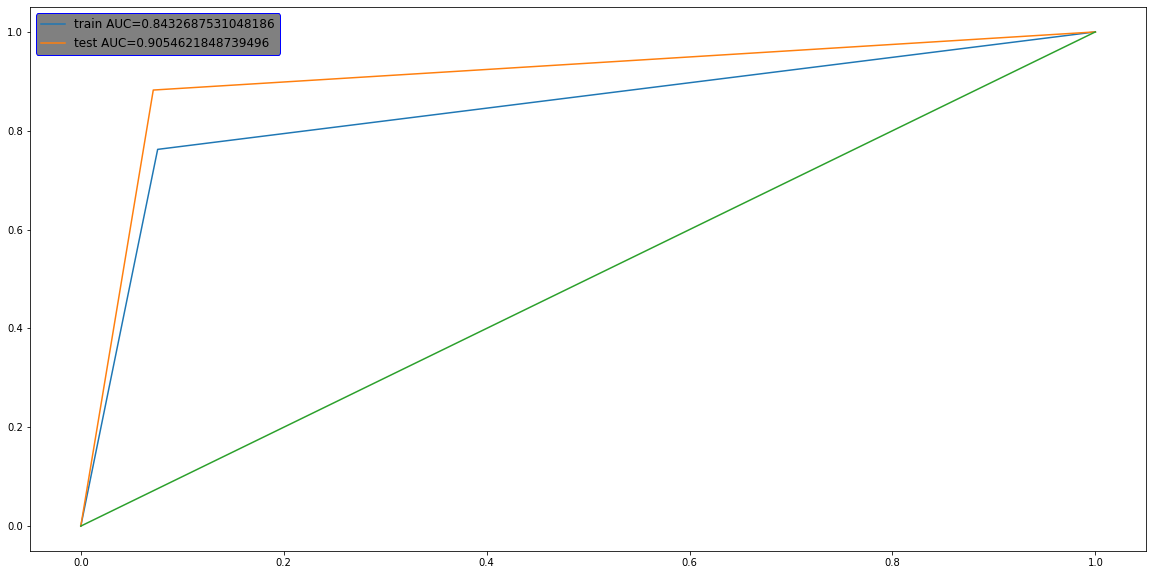

In [78]:
draw_auc(simple_data[2],simple_data[4], dec_tree_search.predict(simple_data[1]),dec_tree_search.predict(simple_data[3]))

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree_search = GridSearchCV(RandomForestClassifier(),
param_grid = { 'n_estimators' : np.arange(3, 300, 3),},
              cv=3,
              verbose=10)
tree_search.fit(simple_data[1], simple_data[2])
tree_predict = tree_search.predict(simple_data[3])
print(accuracy_score(simple_data[4], tree_predict))


In [70]:
give_report(simple_data[4], tree_search.predict(simple_data[3]))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

[[24  4]
 [ 2 15]]


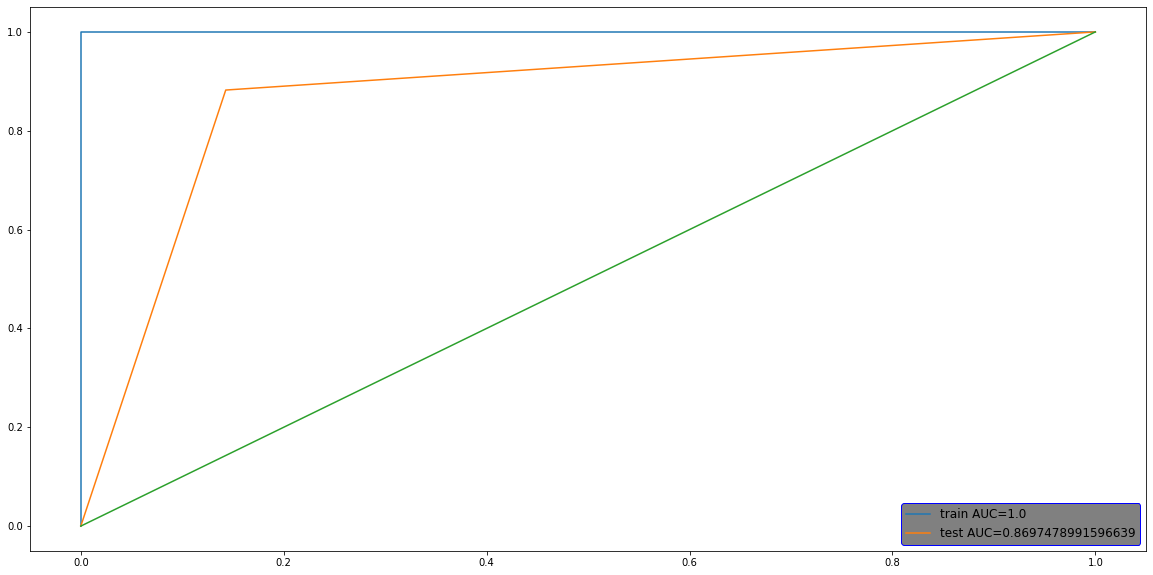

In [71]:
draw_auc(simple_data[2],simple_data[4], tree_search.predict(simple_data[1]),tree_search.predict(simple_data[3]))

In [72]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [ ]:
gbm_search =  GridSearchCV(GradientBoostingClassifier(),
param_grid = {
'n_estimators' : np.arange(1, 100, 2),
},
cv=5,
refit=True,
verbose=10,
)
gbm_search.fit(simple_data[1], simple_data[2])
gbm_predict = gbm_search.predict(simple_data[3])
print(accuracy_score(simple_data[4], gbm_predict))

In [80]:
give_report(simple_data[4], gbm_search.predict(simple_data[3]))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

[[25  3]
 [ 2 15]]


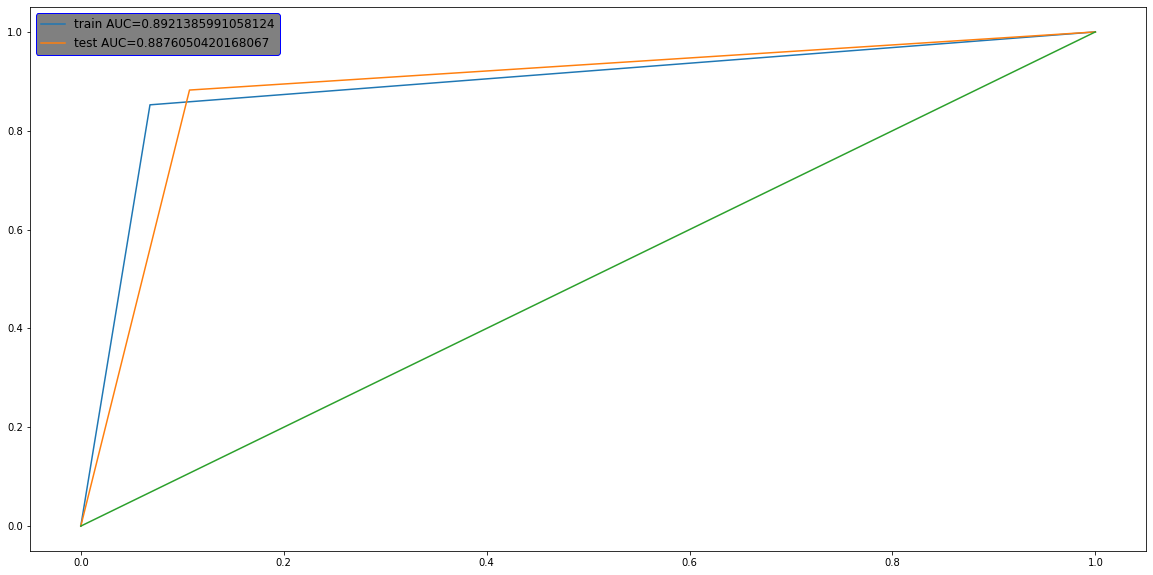

In [84]:
draw_auc(simple_data[2],simple_data[4], gbm_search.predict(simple_data[1]),gbm_search.predict(simple_data[3]))

In [96]:
simple_data[1][4]

array([-0.72341988, -0.4354723 ,  0.51890977,  0.72229343, -0.48114851,
       -0.68768191,  0.68768191,  1.03749163, -0.44271887, -0.61988649,
       -0.28867513,  0.40983991, -0.40983991,  1.02369195, -0.99666109,
       -0.1164445 ,  0.70356236, -0.70356236, -0.27484463,  1.07288356,
       -0.93206759, -0.25309472, -1.10218638,  1.24721913,  0.83598064,
       -0.52704628, -0.38156765, -0.26773978])

In [108]:
len(simple_data[2])

254

In [134]:
def make_feature_from_all_models(data):
  feature_list = [
      search_rbf.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      search_sigmoid.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      search_linear.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      knn_grid_search.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      clf_log.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      dec_tree_search.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      gbm_search.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)),
      
  ]

  feature_frame1 = pd.DataFrame({'rbf': feature_list[0], 'sigmoid':  feature_list[1], 'linear':  feature_list[2]})
  feature_frame2 = pd.DataFrame({'knn': feature_list[3], 'clf_log':  feature_list[4], 'dec_tree':  feature_list[5]})
  
  return (feature_frame1, feature_frame2)
                               

In [148]:
data_with_features = pd.concat([data_with_features, make_feature_from_all_models(simple_data)[1]],axis=1)

In [159]:
data_feature1 = scaling_and_transform(data_with_features, feature=True, dop_features=['rbf','sigmoid', 'linear'])

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


KeyError: ignored

In [153]:
data_feature1

(      id  age        dataset  trestbps   chol  thalch  oldpeak  num  knn  \
 0      1   63      Cleveland     145.0  233.0   150.0      2.3    0  0.0   
 1      2   67      Cleveland     160.0  286.0   108.0      1.5    2  1.0   
 2      3   67      Cleveland     120.0  229.0   129.0      2.6    1  1.0   
 3      4   37      Cleveland     130.0  250.0   187.0      3.5    0  0.0   
 4      5   41      Cleveland     130.0  204.0   172.0      1.4    0  0.0   
 ..   ...  ...            ...       ...    ...     ...      ...  ...  ...   
 299  300   68      Cleveland     144.0  193.0   141.0      3.4    2  NaN   
 300  301   57      Cleveland     130.0  131.0   115.0      1.2    3  NaN   
 301  302   57      Cleveland     130.0  236.0   174.0      0.0    1  NaN   
 508  509   47        Hungary     150.0  226.0    98.0      1.5    1  NaN   
 748  749   56  VA Long Beach     120.0  100.0   120.0      1.5    1  NaN   
 
      clf_log  ...  slope_downsloping  slope_flat  slope_upsloping  \
 0  

In [150]:
gbm_search =  GridSearchCV(GradientBoostingClassifier(),
param_grid = {
'n_estimators' : np.arange(1, 100, 2),
},
cv=5,
refit=True,
verbose=10,
)
gbm_search.fit(data_feature[1], data_feature[2])
gbm_predict = gbm_search.predict(data_feature[3])
print(accuracy_score(data_feature[4], gbm_predict))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START n_estimators=1.............................................
[CV 1/5; 1/50] END ................n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 1/50] START n_estimators=1.............................................
[CV 2/5; 1/50] END ................n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 1/50] START n_estimators=1.............................................
[CV 3/5; 1/50] END ................n_estimators=1;, score=nan total time=   0.0s
[CV 4/5; 1/50] START n_estimators=1.............................................
[CV 4/5; 1/50] END ................n_estimators=1;, score=nan total time=   0.0s
[CV 5/5; 1/50] START n_estimators=1.............................................
[CV 5/5; 1/50] END ................n_estimators=1;, score=nan total time=   0.0s
[CV 1/5; 2/50] START n_estimators=3.............................................
[CV 1/5; 2/50] END ................n_estimators

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 486, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ut

ValueError: ignored